In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('healthcare_dataset_new.csv')
df.head()


Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        31-01-2024   
1   LesLie TErRy   62    Male         A+           Obesity        20-08-2019   
2    DaNnY sMitH   76  Female         A-           Obesity        22-09-2022   
3   andrEw waTtS   28  Female         O+          Diabetes        18-11-2020   
4  adrIENNE bEll   43  Female        AB+            Cancer        19-09-2022   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0     18856.28131          328         Urgent     02-02-2024  Paracetamol   
1     33643.32729          265      Emergency     26-08-2019    Ibuprofen   
2     27955.09608          205      Emergency     07-10-2022      Aspirin   
3     37909.78241          450       Elective     18-12-2020    Ibuprofen   
4     14238.31781          458         Urgent     09-10-2022   Penicillin   

   Test Results  
0        Normal  
1  Inconclusive  
2        Normal  
3      Abnormal  
4      Abnormal

In [3]:
df.shape

(55500, 15)

In [4]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [5]:
df.duplicated().sum()

534

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.describe()

Age  Billing Amount   Room Number
count  54966.000000    54966.000000  54966.000000
mean      51.535185    25544.306284    301.124404
std       19.605661    14208.409711    115.223143
min       13.000000    -2008.492140    101.000000
25%       35.000000    13243.718638    202.000000
50%       52.000000    25542.749145    302.000000
75%       68.000000    37819.858157    401.000000
max       89.000000    52764.276740    500.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  object 
 1   Age                 54966 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Room Number         54966 non-null  int64  
 11  Admission Type      54966 non-null  object 
 12  Discharge Date      54966 non-null  object 
 13  Medication          54966 non-null  object 
 14  Test Results        54966 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.7+ MB


In [10]:
df.nunique()

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64

In [11]:
object_columns = df.select_dtypes(include=['object']).columns

In [12]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns

In [13]:
print("Object Columns are:",object_columns)
print("Numerical Columns are:",numerical_columns)

Object Columns are: Index(['Name', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Admission Type', 'Discharge Date', 'Medication', 'Test Results'],
      dtype='object')
Numerical Columns are: Index(['Age', 'Billing Amount', 'Room Number'], dtype='object')


In [14]:
def classify_features(df):
    categorical_features=[]
    non_categorical_features = []
    discrete_features=[]
    continuous_features=[]
    
    for column in df.columns:
        if df[column].dtype =='object':
            if df[column].nunique()<10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64','float64']:
            if df[column].nunique()<10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)
    return categorical_features,non_categorical_features,discrete_features,continuous_features

categorical, non_categorical , discrete, continuous = classify_features(df)

print("Categorical: ",categorical)
print("*"*10)
print("Numerical: ",non_categorical)
print("*"*10)
print("Discrete: ",discrete)
print("*"*10)
print("continuous: ",continuous)
print("*"*10)
        
        

Categorical:  ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']
**********
Numerical:  ['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Discharge Date']
**********
Discrete:  []
**********
continuous:  ['Age', 'Billing Amount', 'Room Number']
**********


## Univariate Analysis

#### Categorical Column

In [15]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

Gender
['Male' 'Female']

Blood Type
['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']

Medical Condition
['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']

Insurance Provider
['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']

Admission Type
['Urgent' 'Emergency' 'Elective']

Medication
['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']

Test Results
['Normal' 'Inconclusive' 'Abnormal']



In [16]:
for i in categorical:
    print(df[i].value_counts())
    print()

Gender
Male      27496
Female    27470
Name: count, dtype: int64

Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64

Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64

Insurance Provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64

Admission Type
Elective     18473
Urgent       18391
Emergency    18102
Name: count, dtype: int64

Medication
Lipitor        11038
Ibuprofen      11023
Aspirin        10984
Paracetamol    10965
Penicillin     10956
Name: count, dtype: int64

Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64



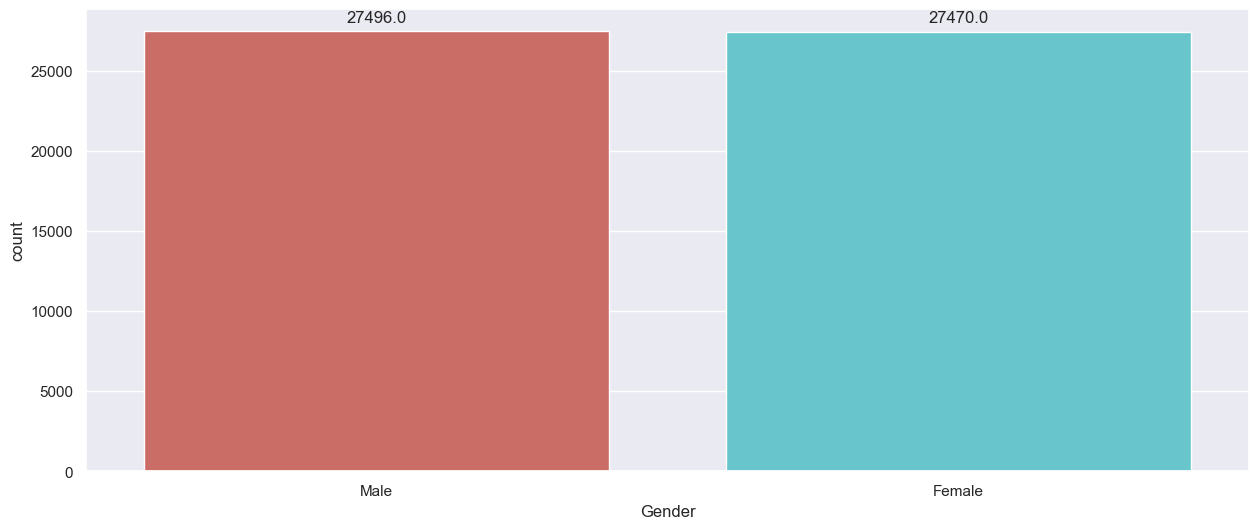

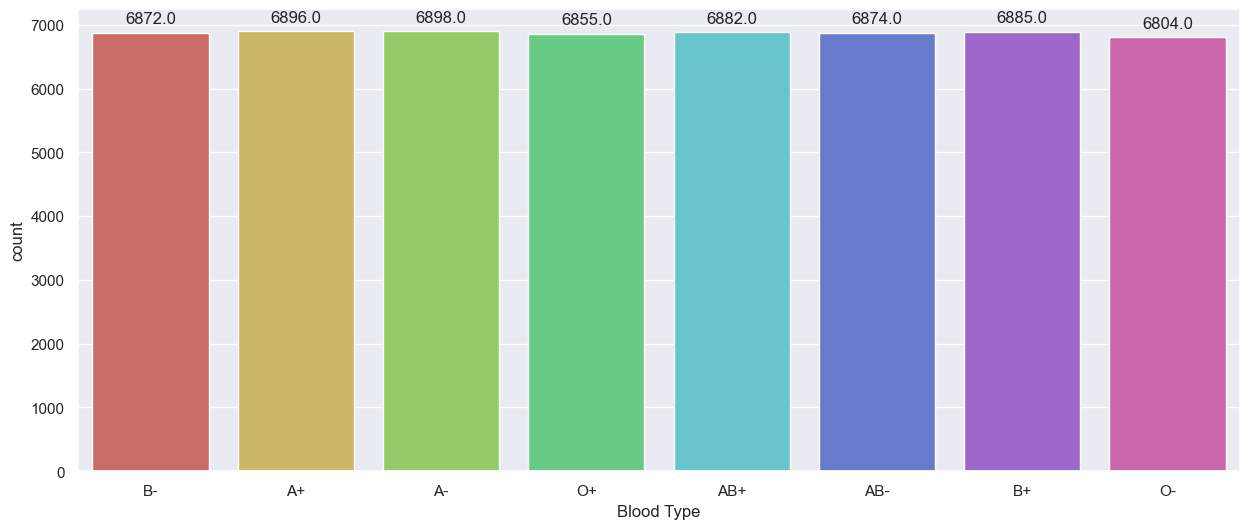

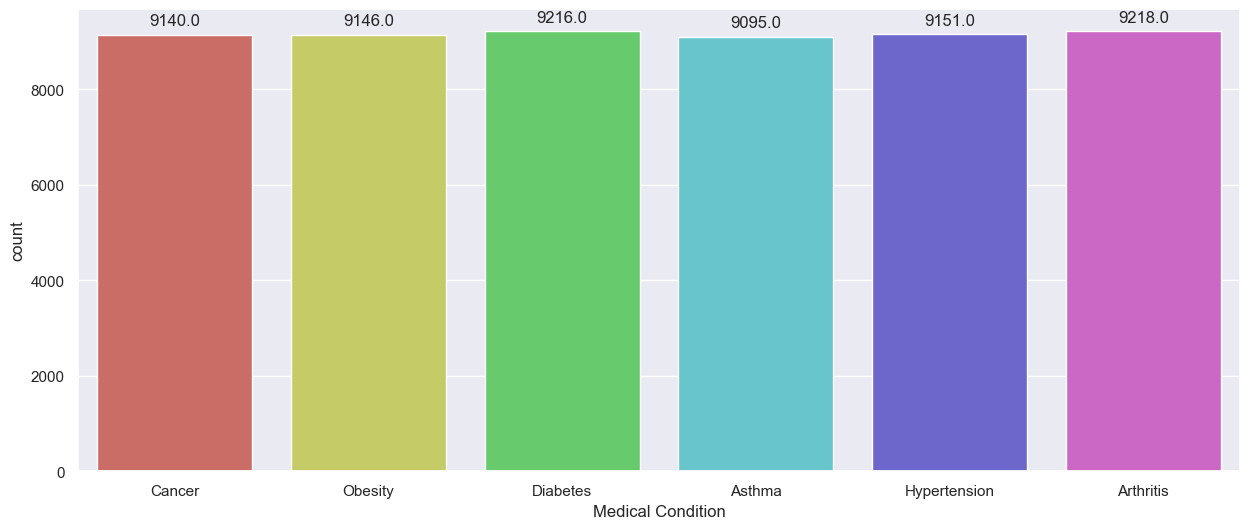

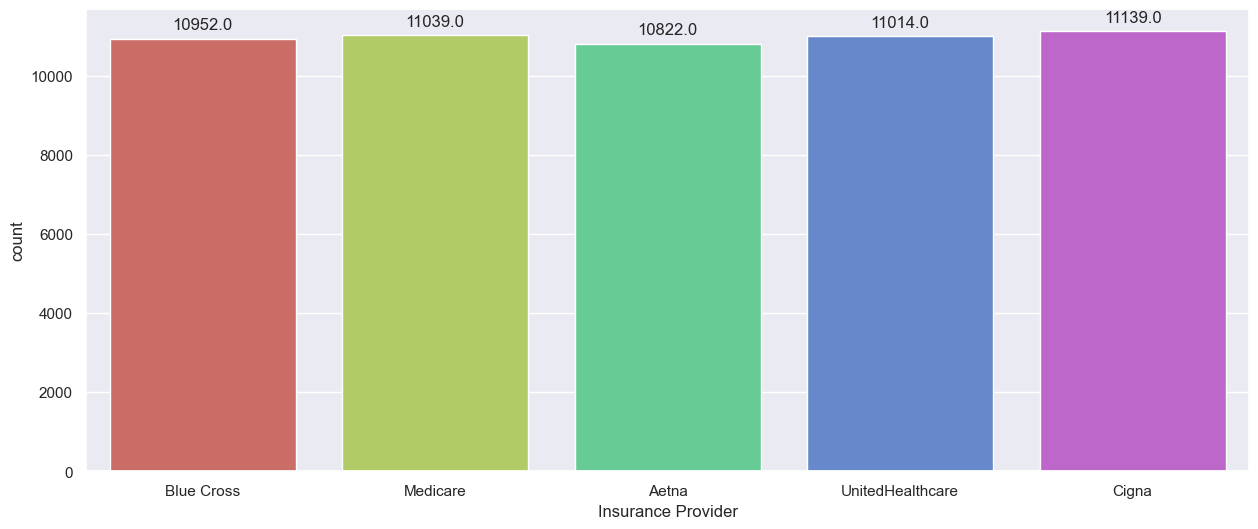

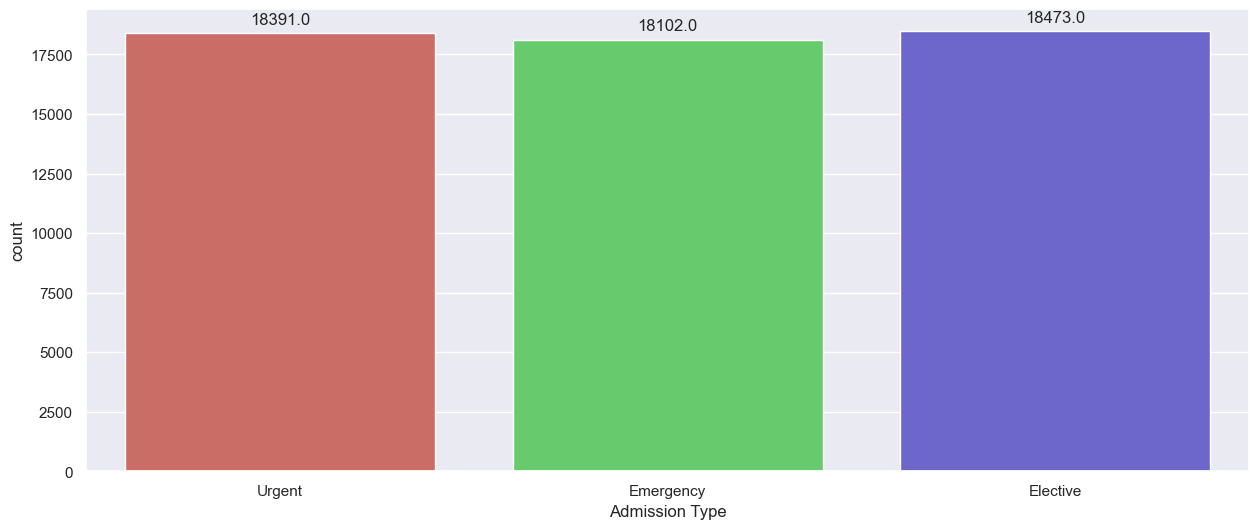

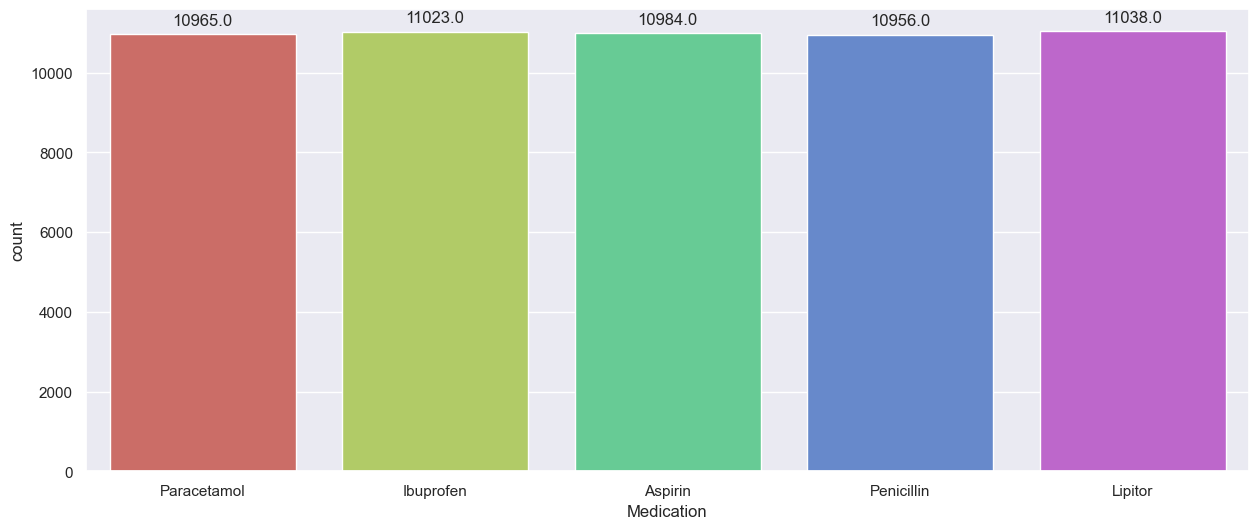

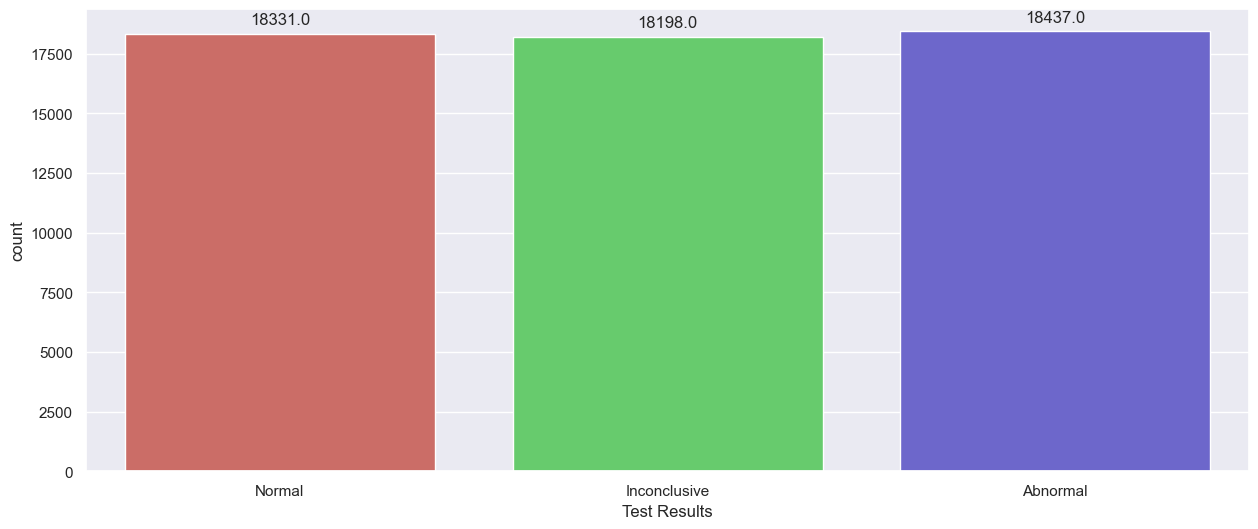

In [17]:
for i in categorical:
    plt.figure(figsize=(15,6))
    ax =sns.countplot(x=i,data=df,palette='hls') 
    for p in ax.patches:
        
        height=p.get_height()
        ax.annotate(f"{height}",xy =(p.get_x()+ p.get_width()/2, height ), xytext=(0,10),textcoords="offset points",ha='center',va='center')
    plt.show()    
    

In [18]:
import plotly.express as px
for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts,values=counts.values,names=counts.index,title=f"Dist of {i}")
    fig.show()

#### Continuous Column

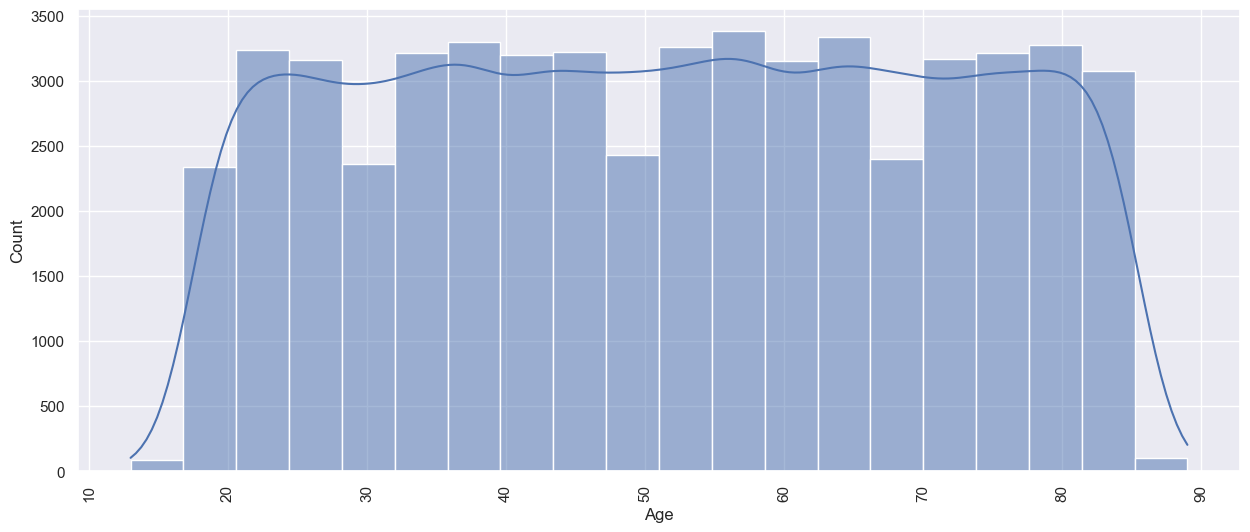

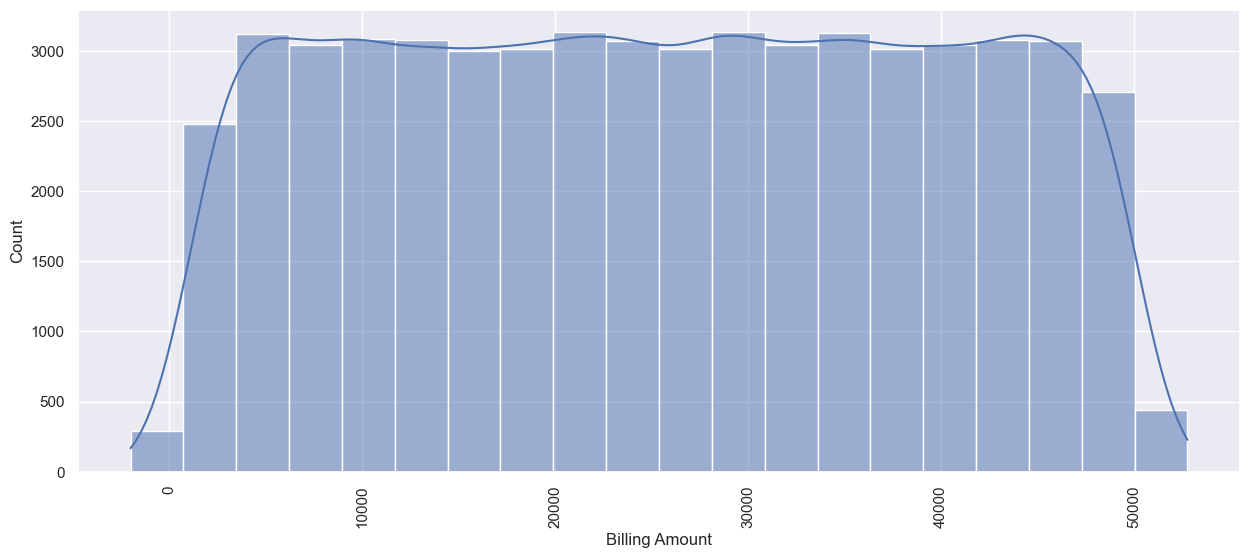

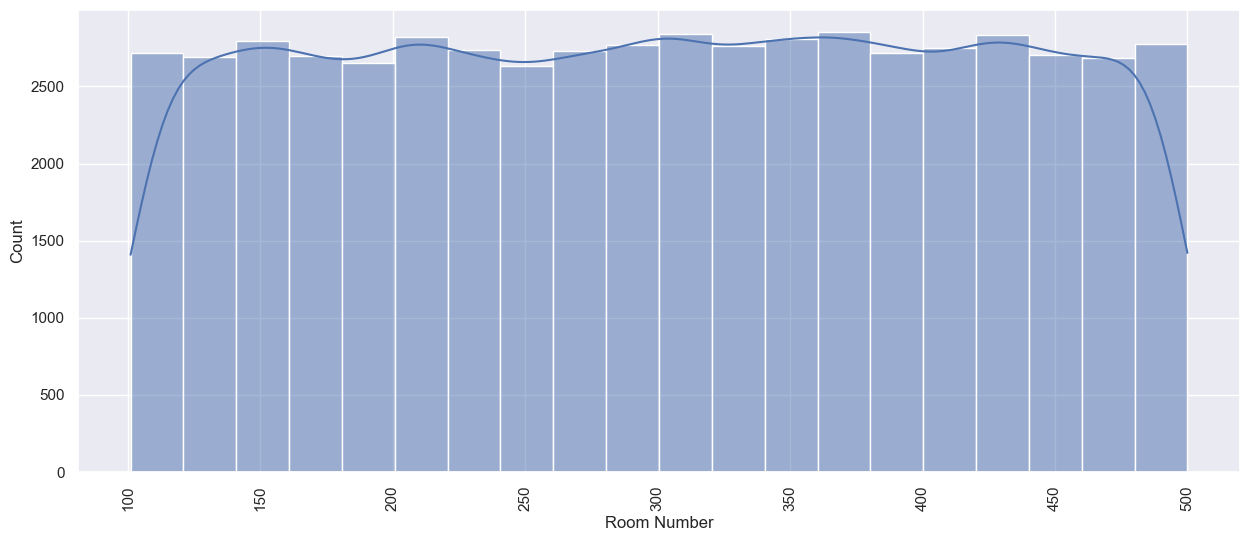

In [19]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i],bins=20,kde=True,palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

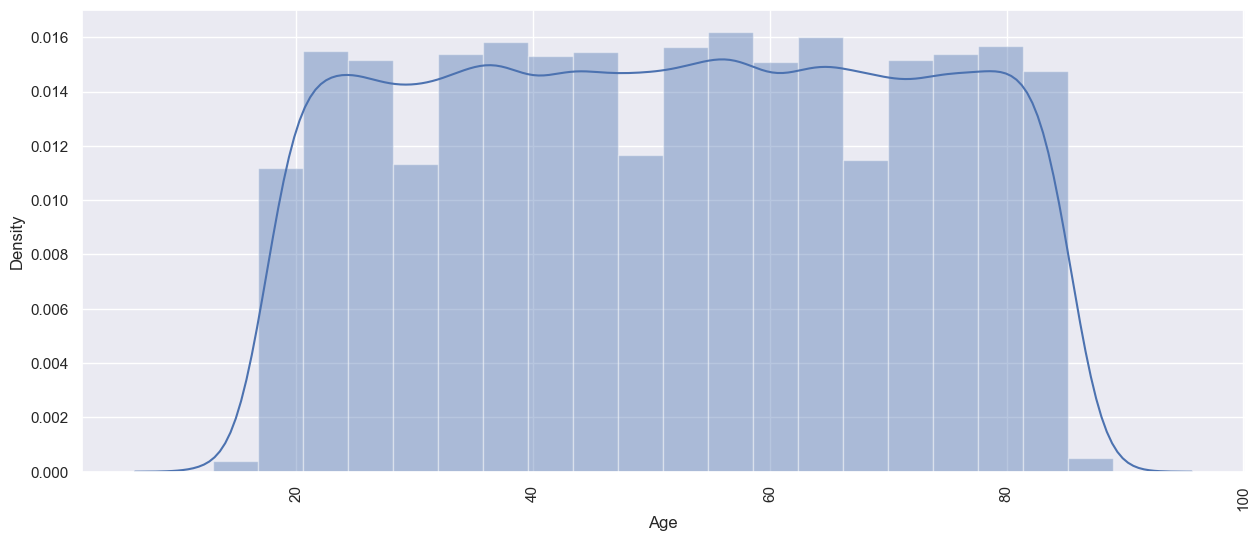

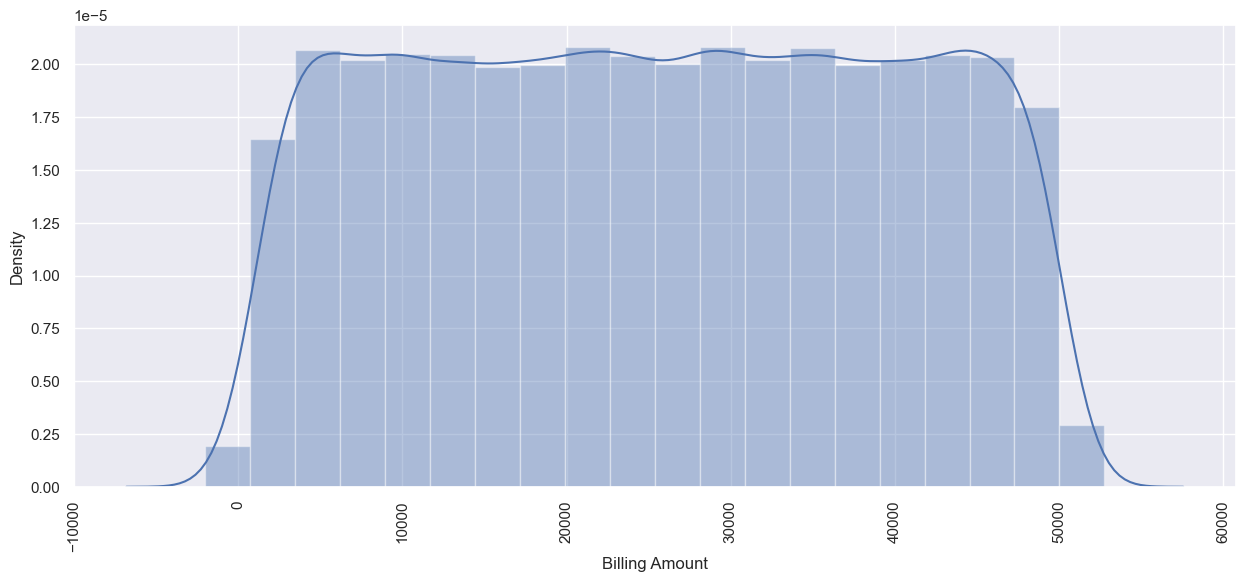

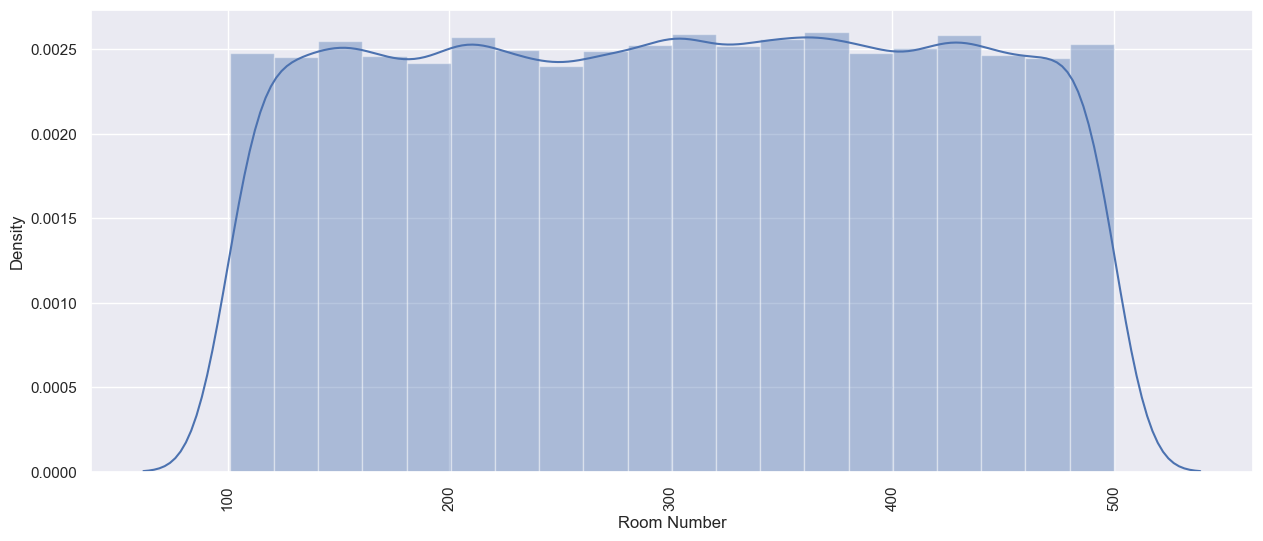

In [20]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i],bins=20,kde=True)
    plt.xticks(rotation = 90)
    plt.show()

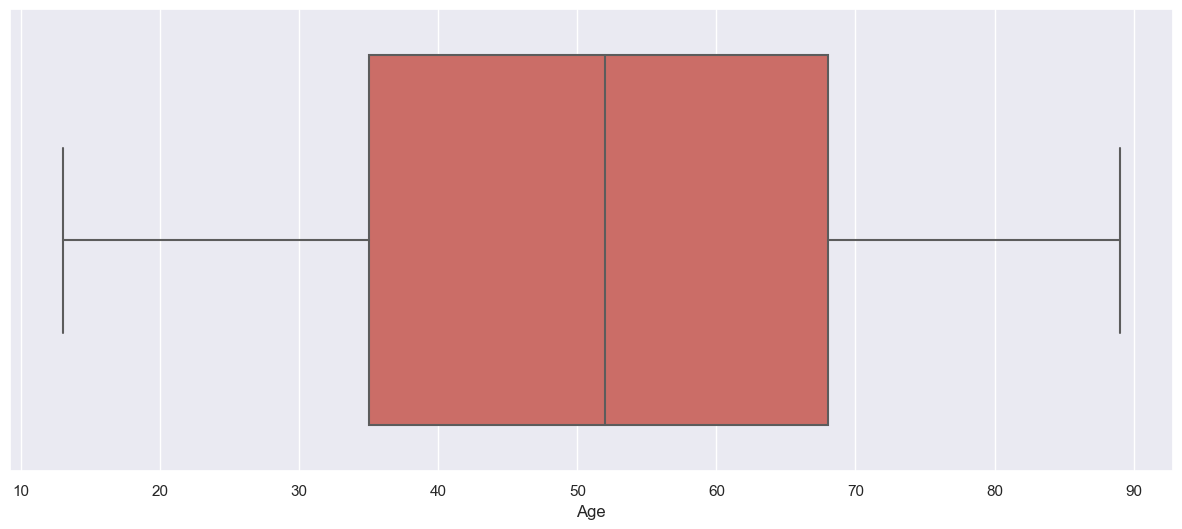

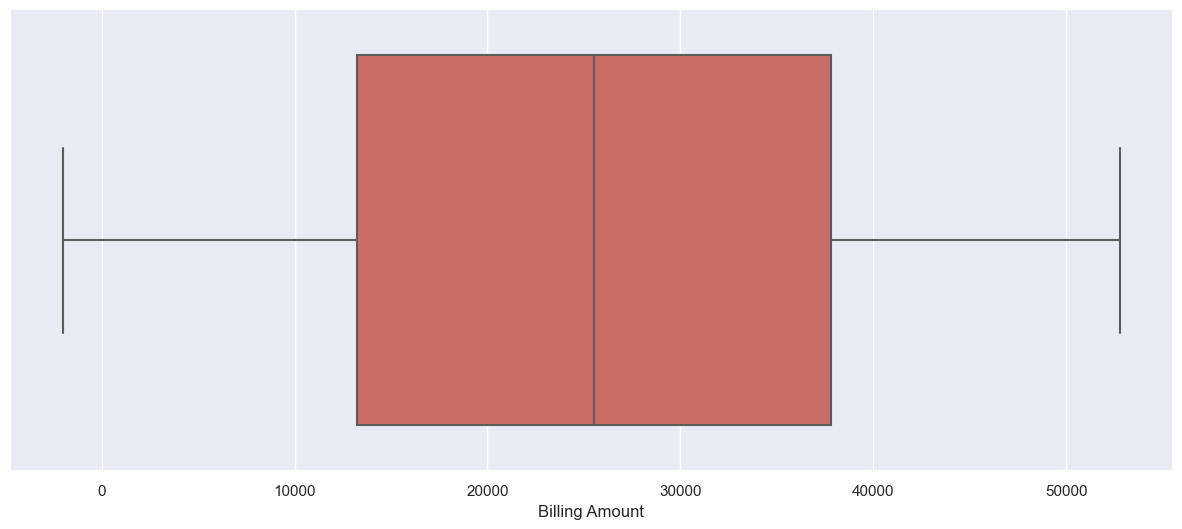

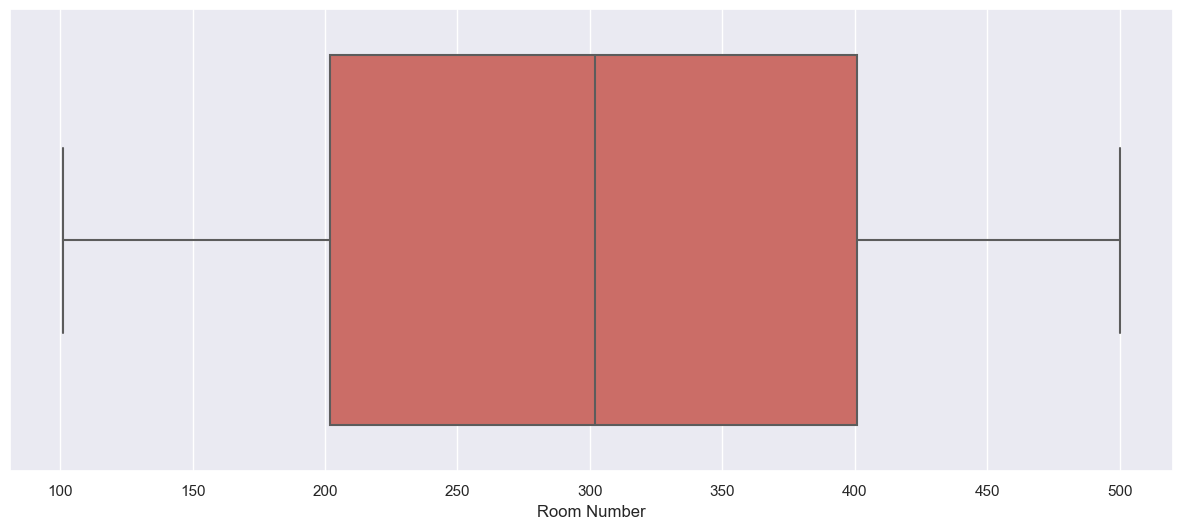

In [21]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=i,data=df,palette='hls')
    plt.show()

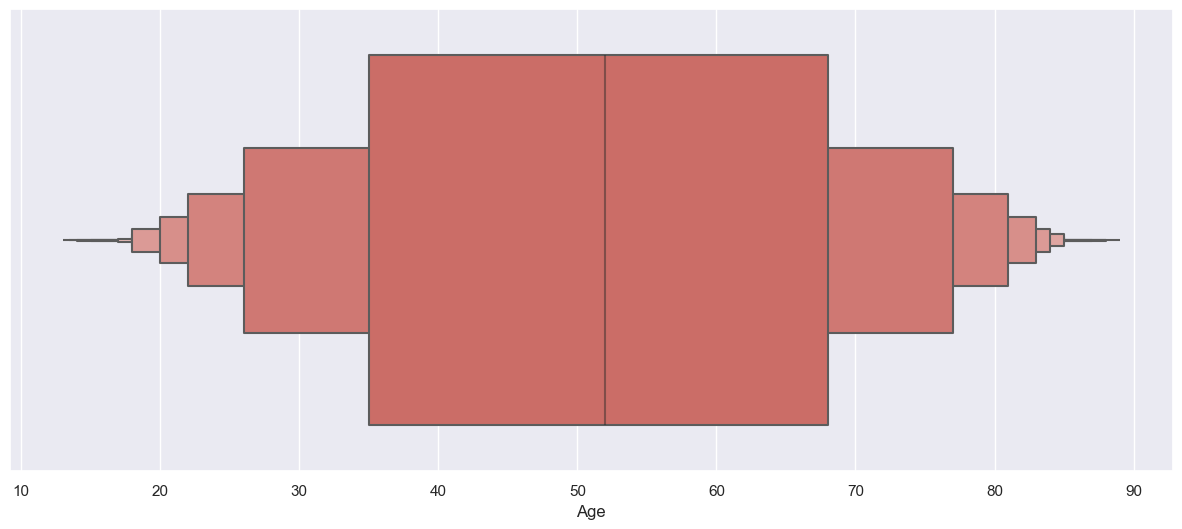

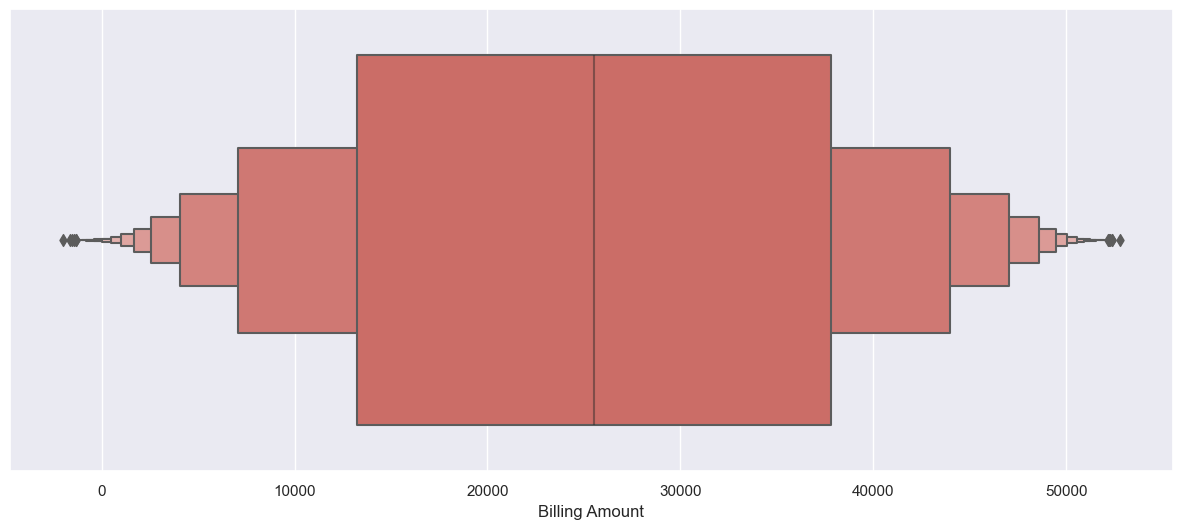

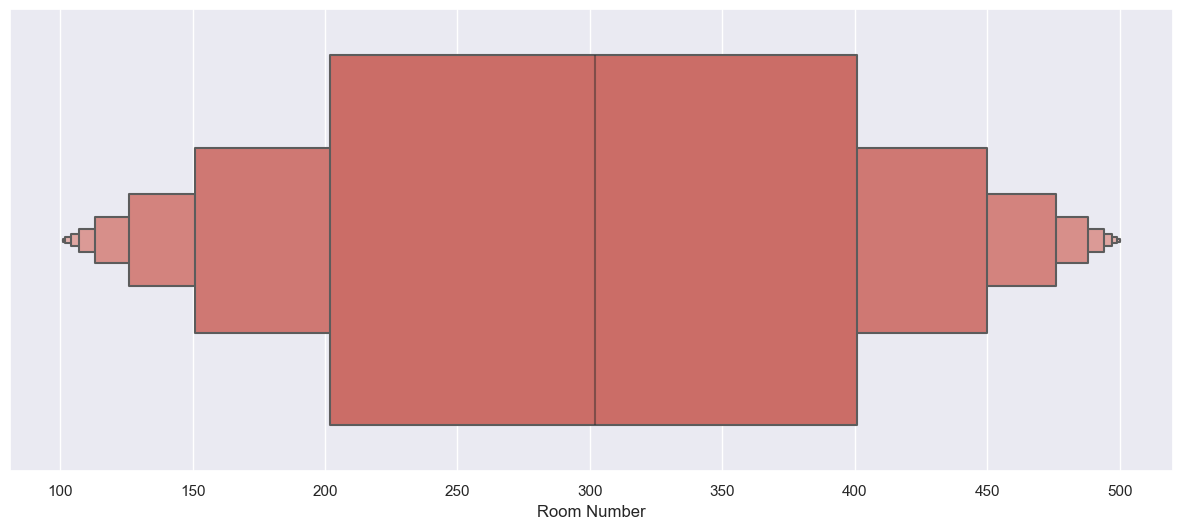

In [22]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.boxenplot(x=i,data=df,palette='hls')
    plt.show()

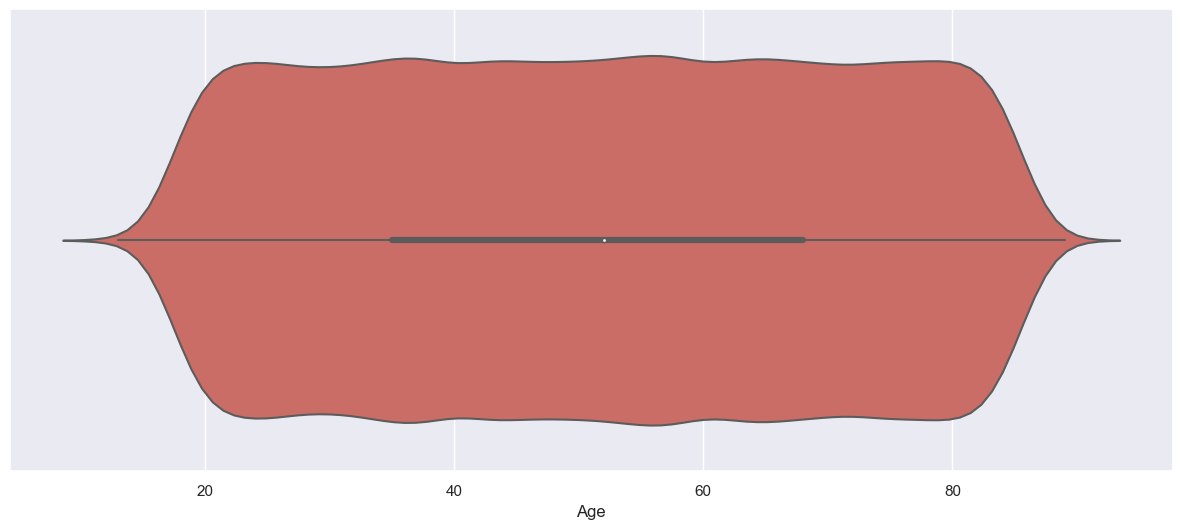

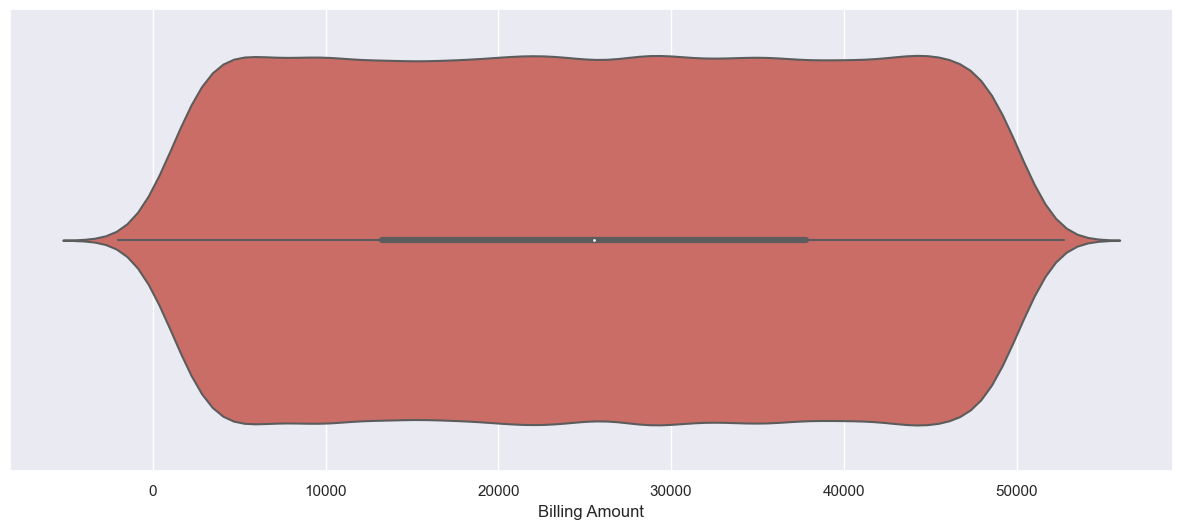

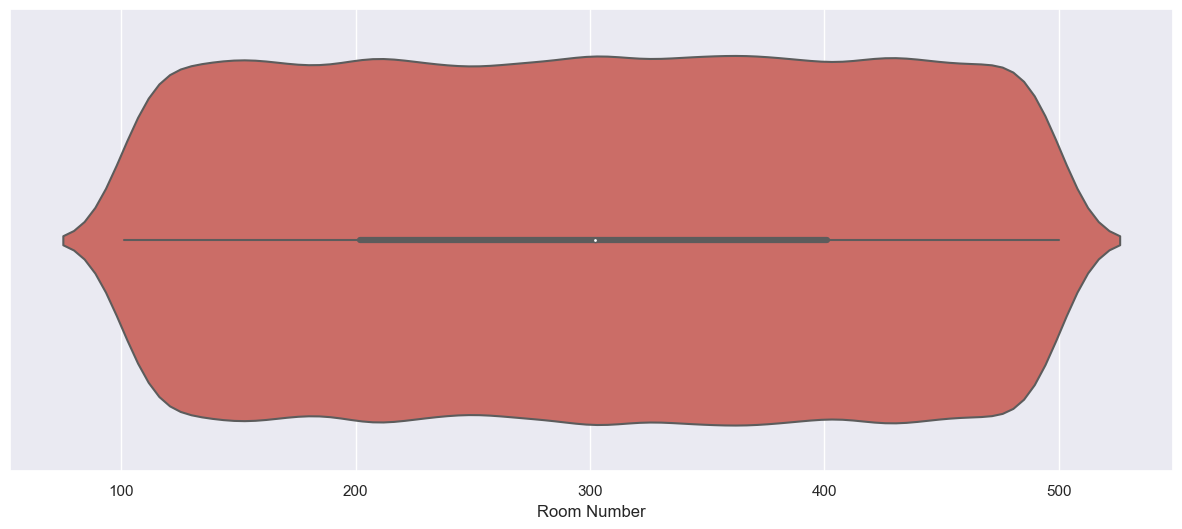

In [23]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.violinplot(x=i,data=df,palette='hls')
    plt.show()

## Bivariate Analysis

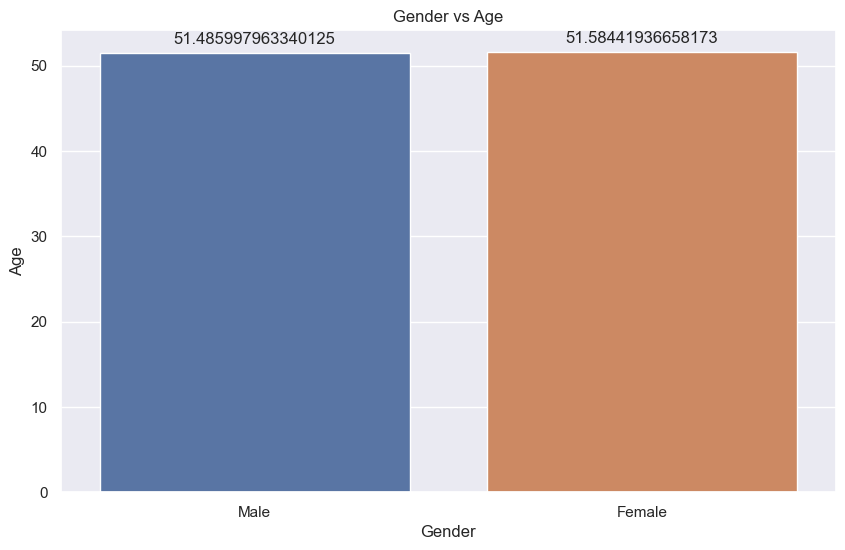

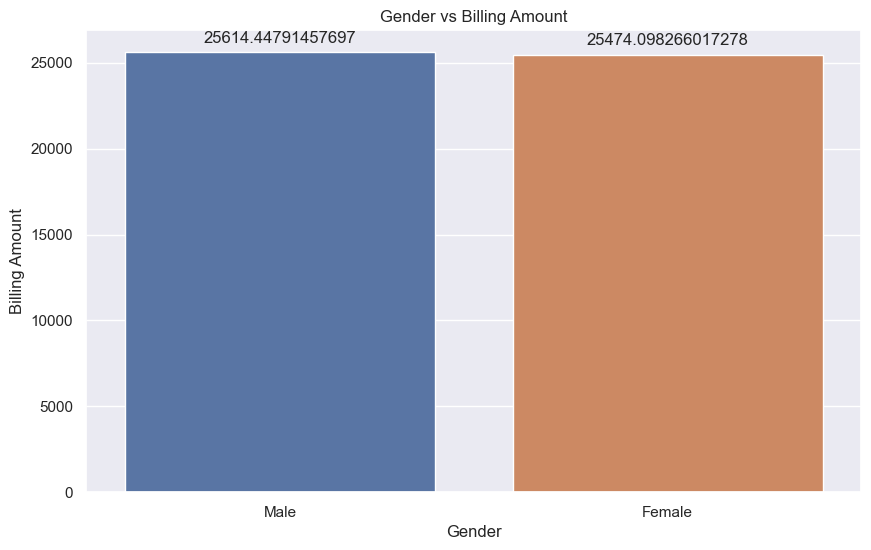

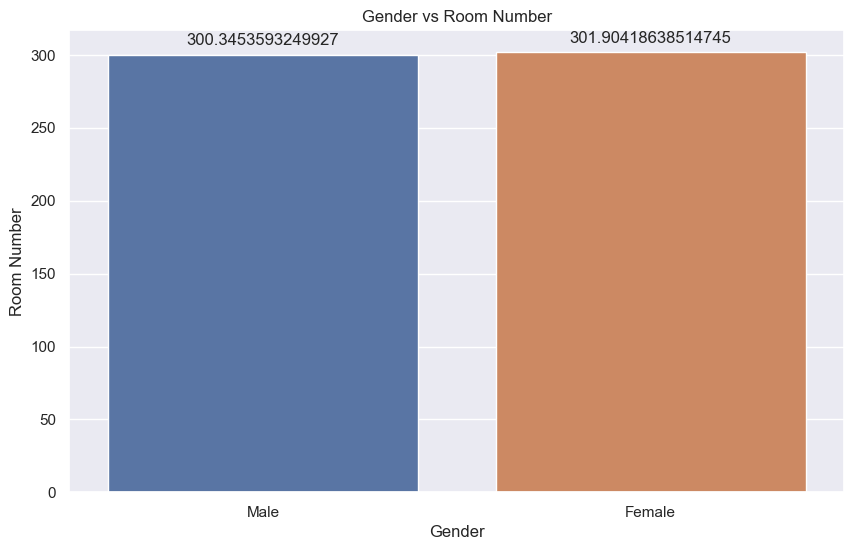

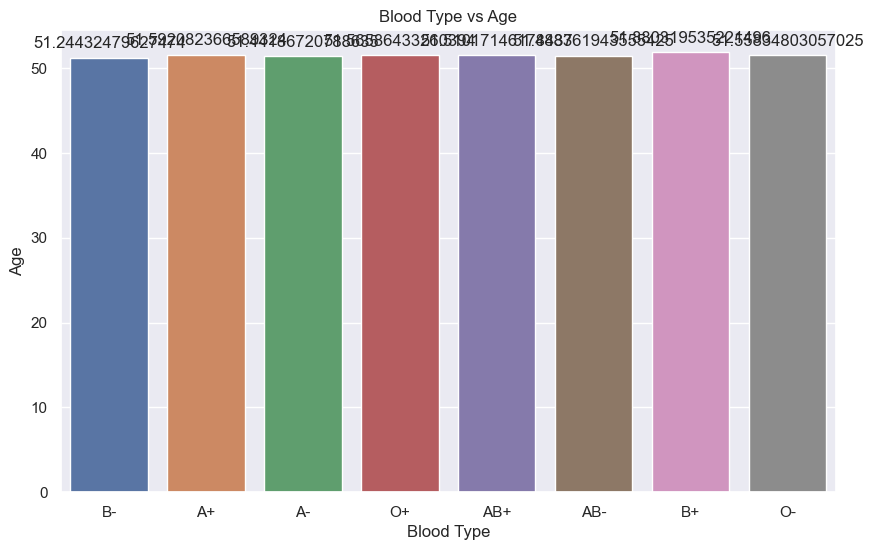

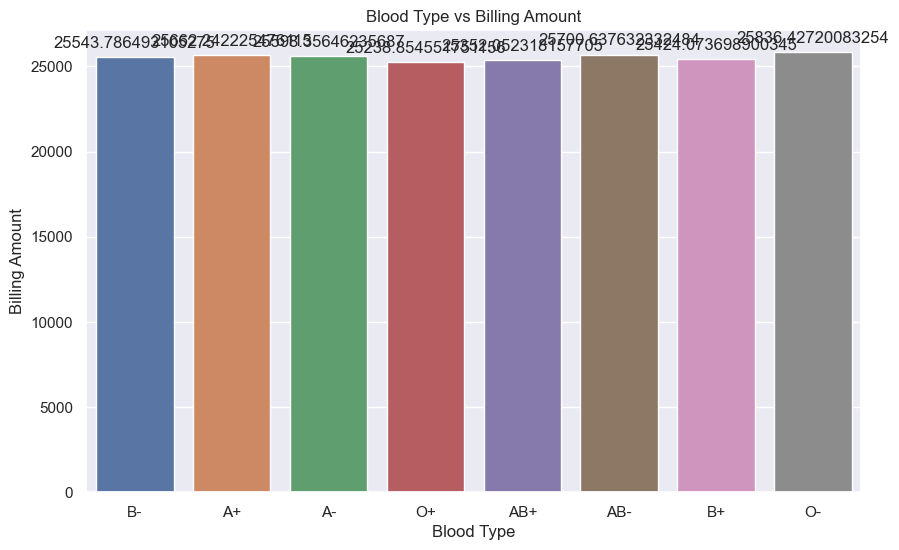

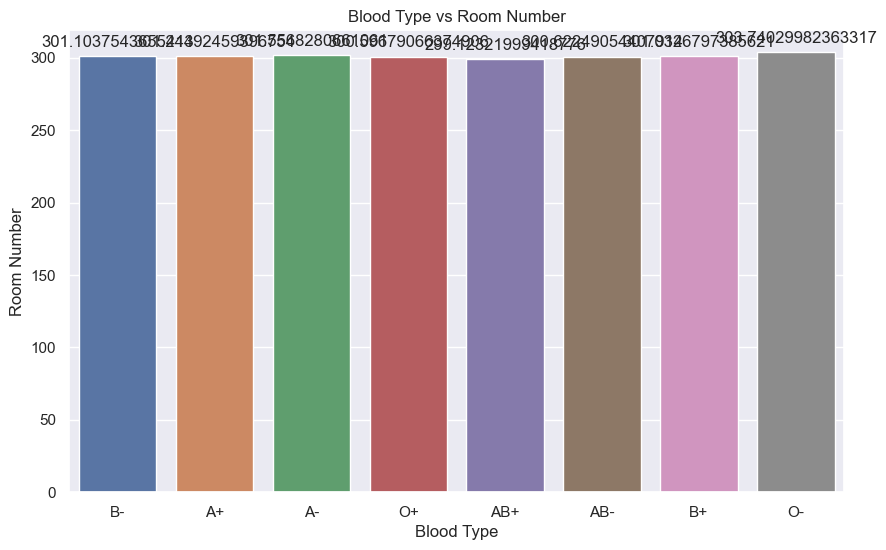

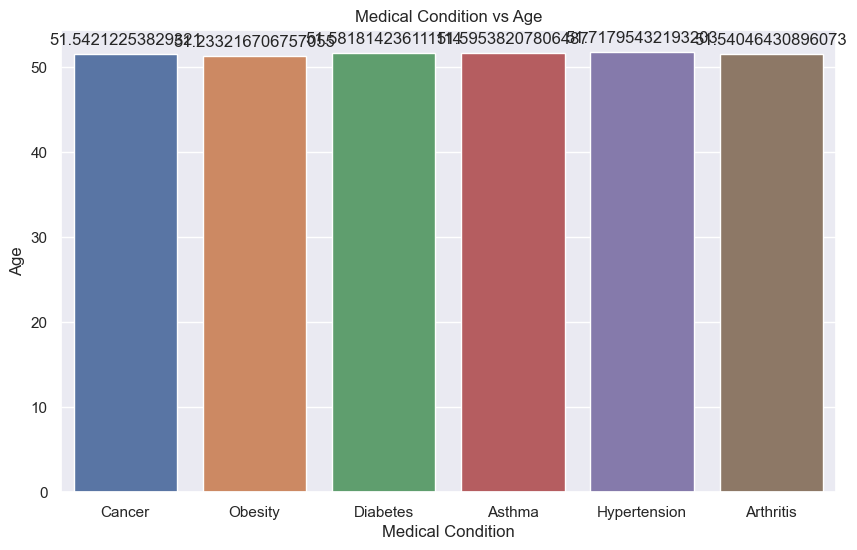

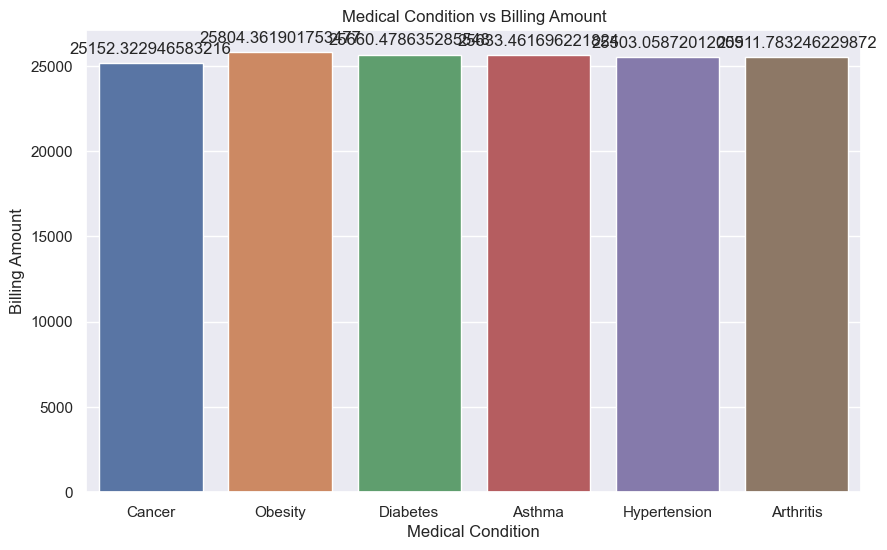

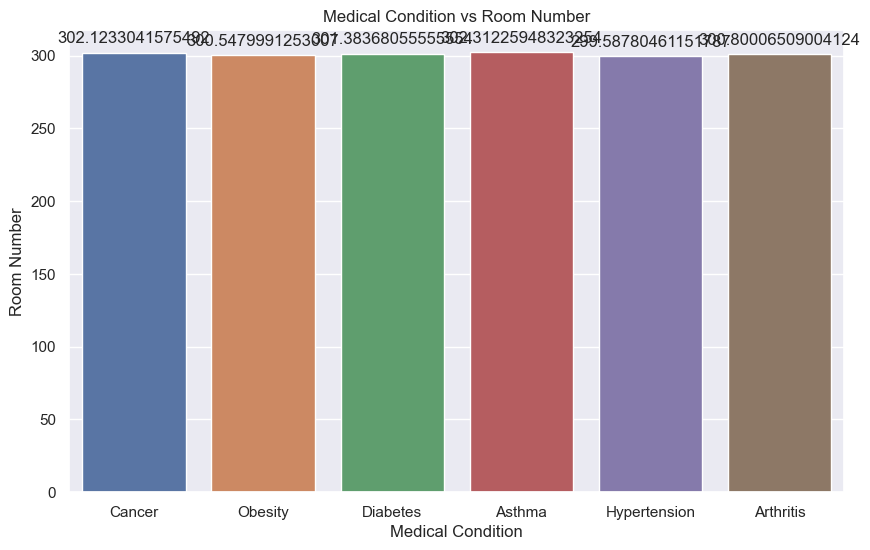

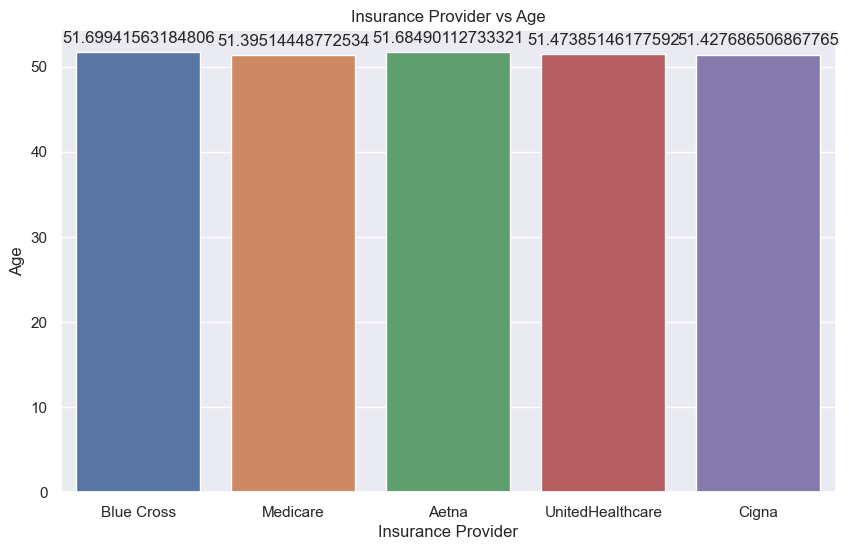

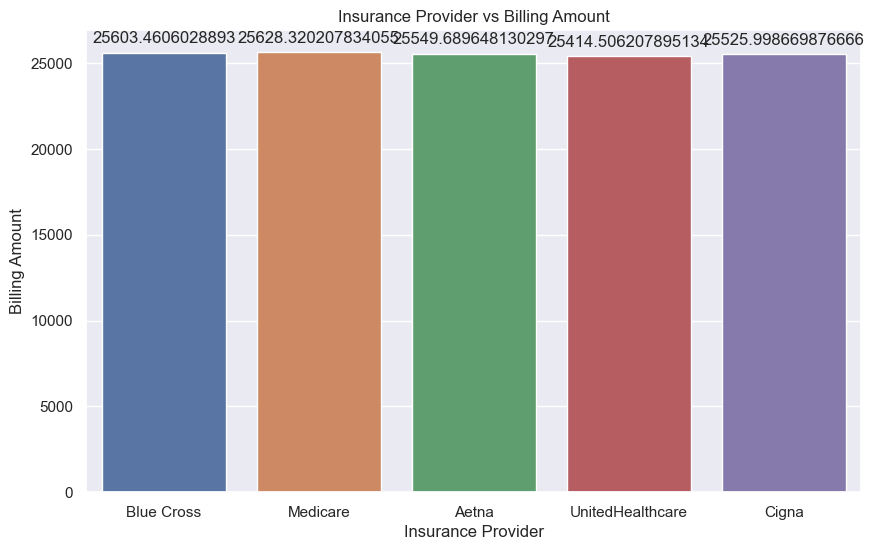

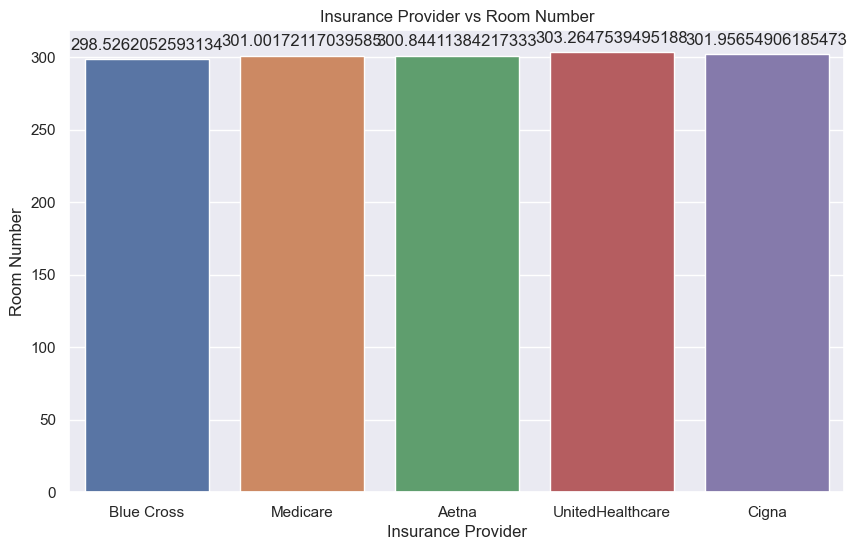

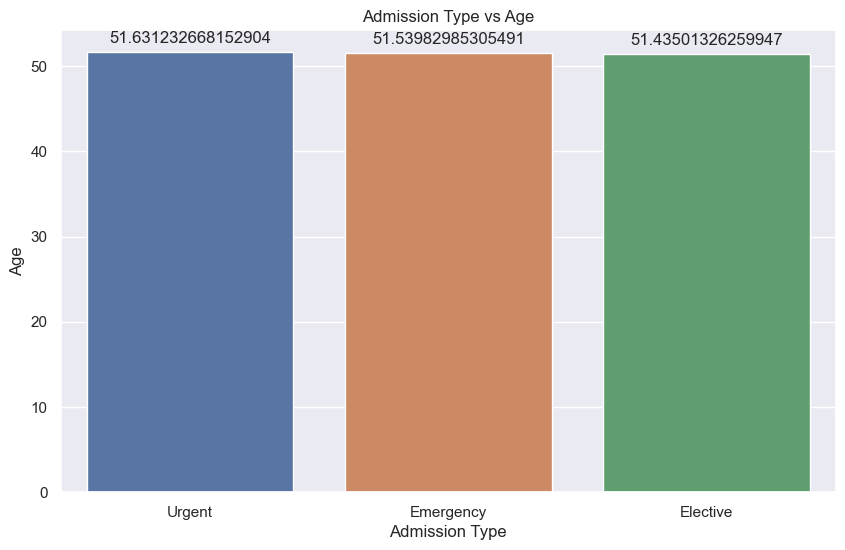

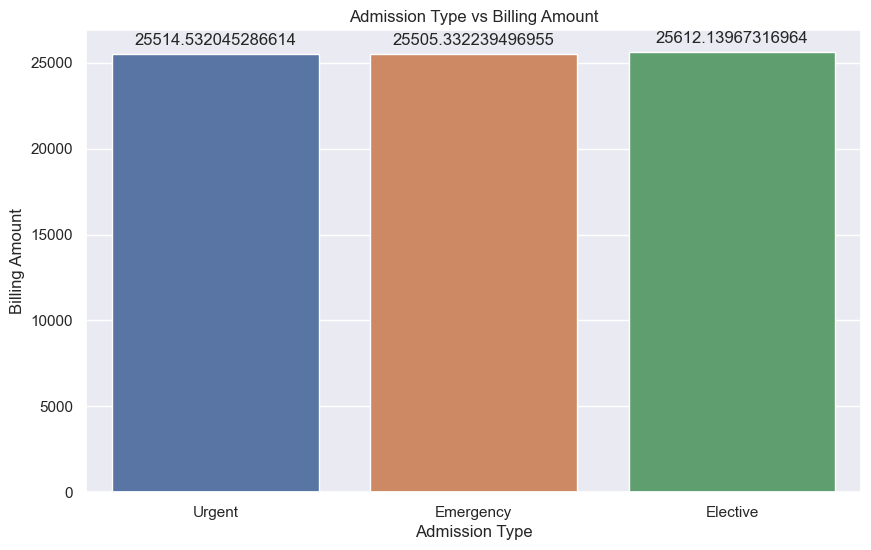

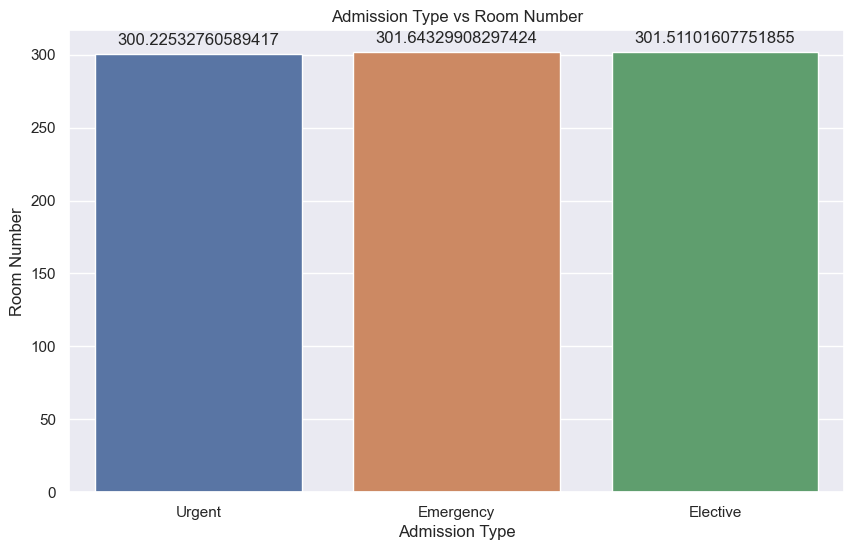

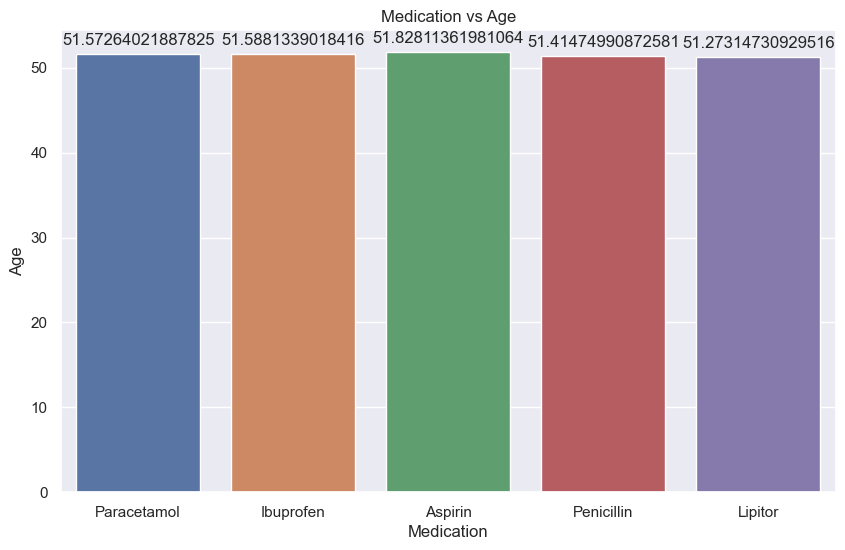

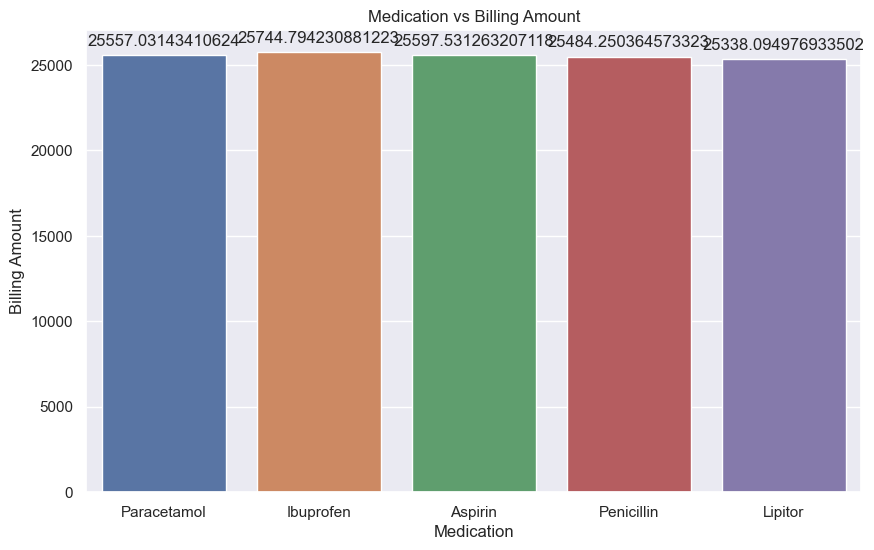

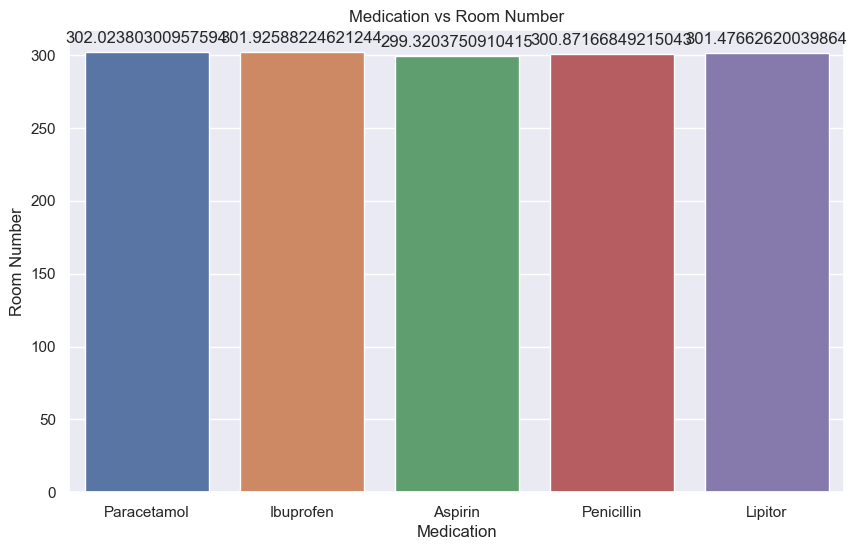

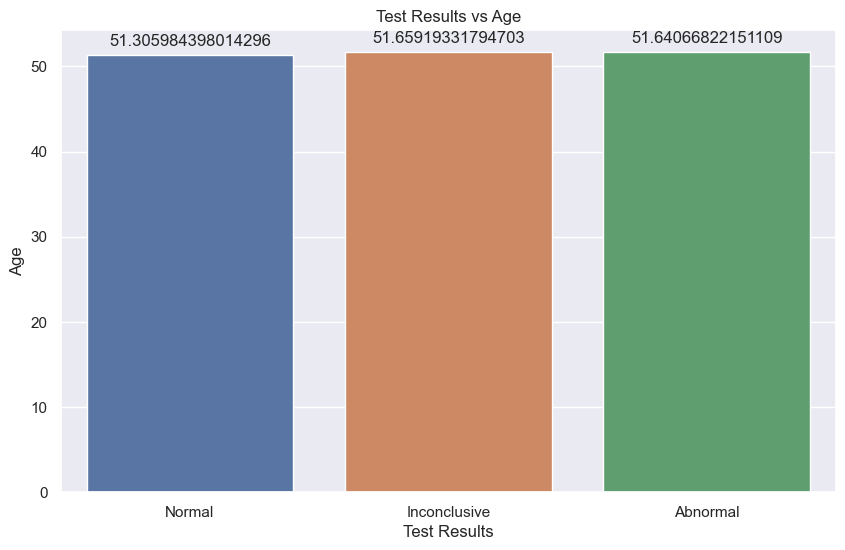

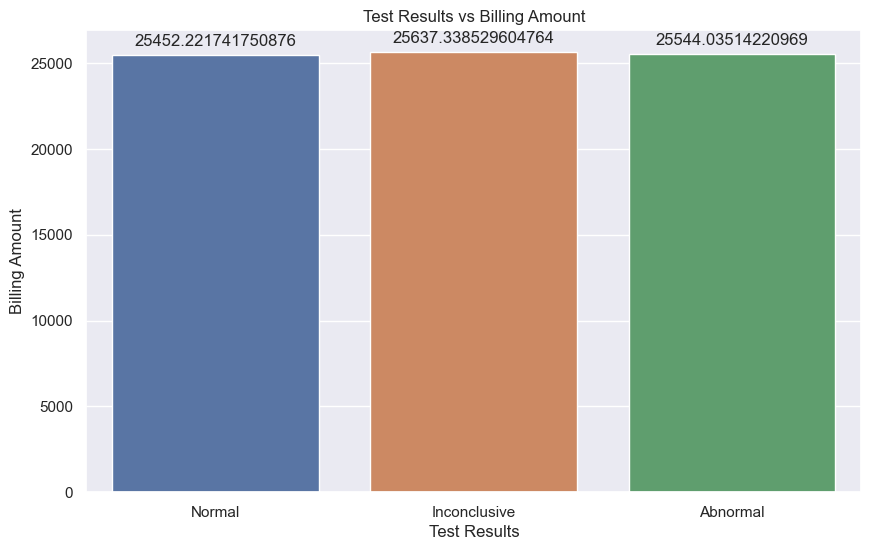

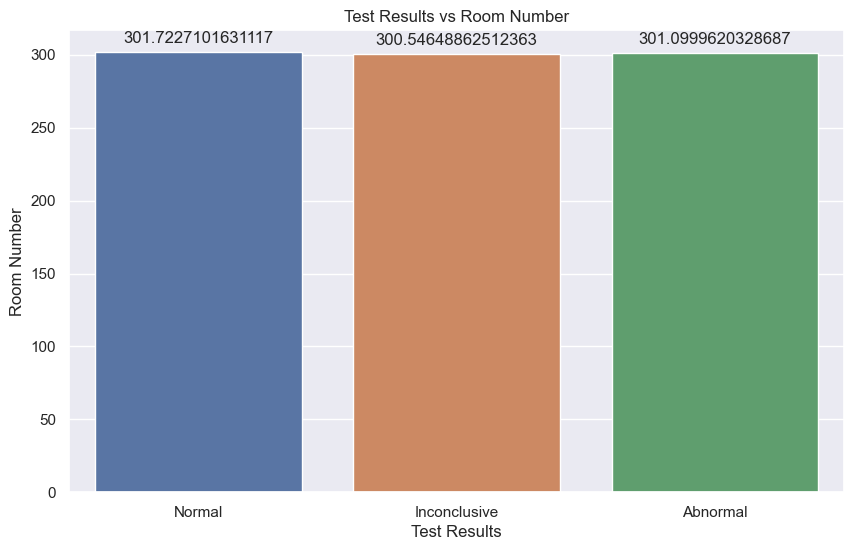

In [24]:
for dis in categorical:
    for cont in continuous:
        plt.figure(figsize=(10,6))
        ax=sns.barplot(data=df,x=dis,y=cont,ci=None)
        plt.title(f'{dis} vs {cont}')
        
        for p in ax.patches:
            height=p.get_height()
            ax.annotate(f"{height}",xy =(p.get_x()+ p.get_width()/2, height ), xytext=(0,10),textcoords="offset points",ha='center',va='center')



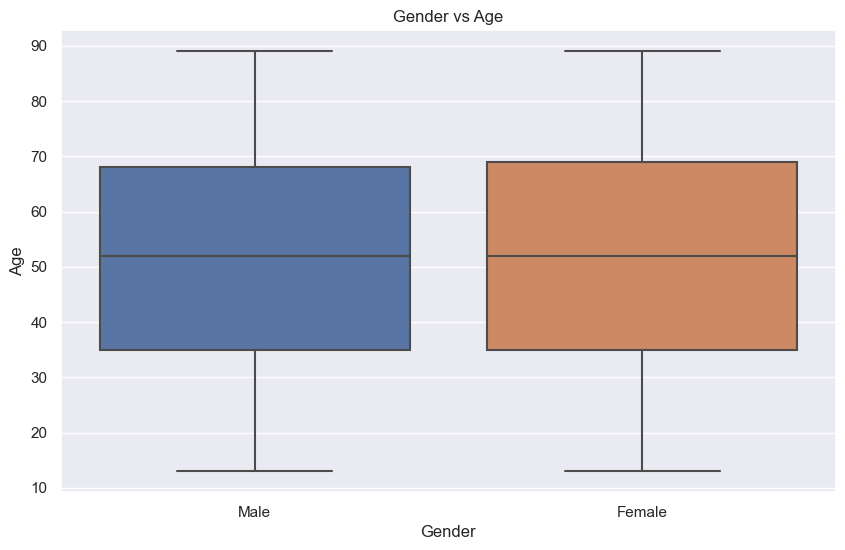

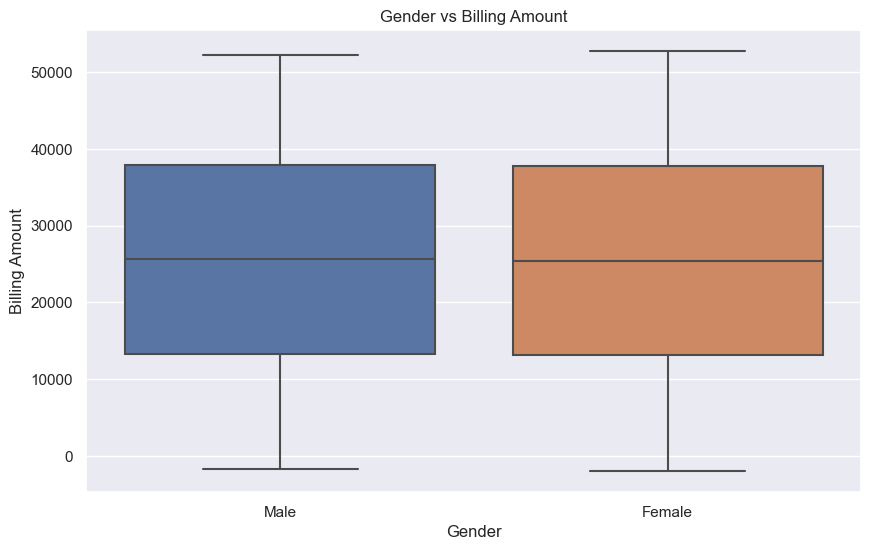

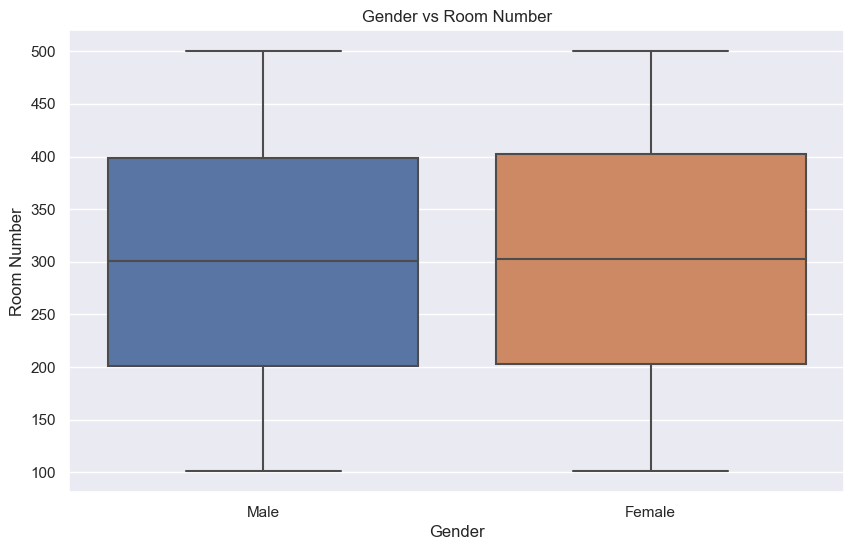

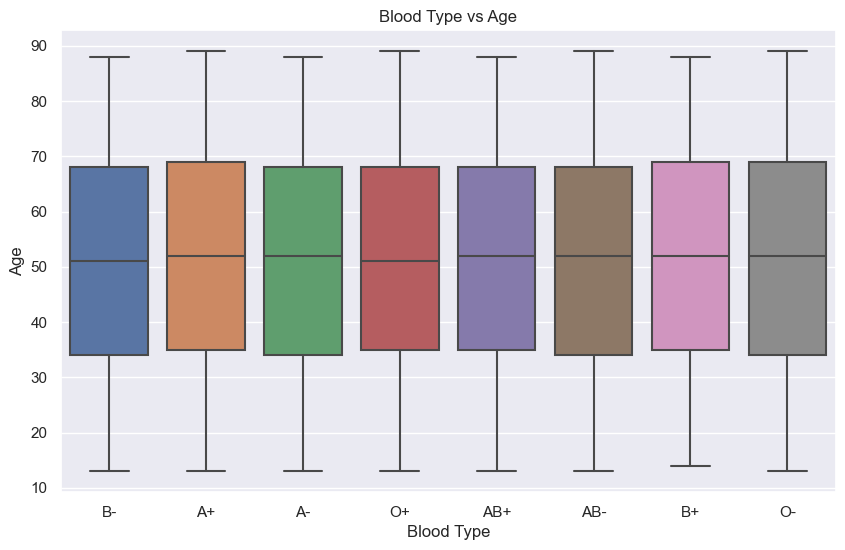

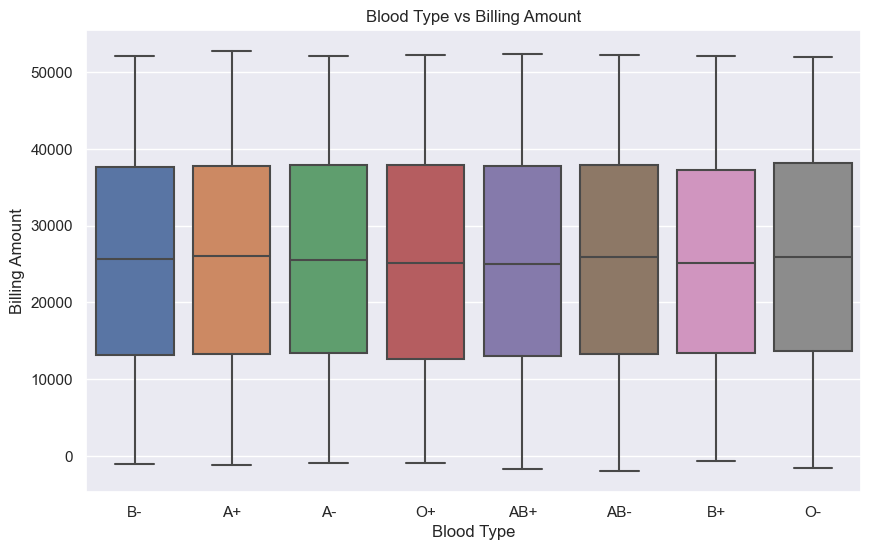

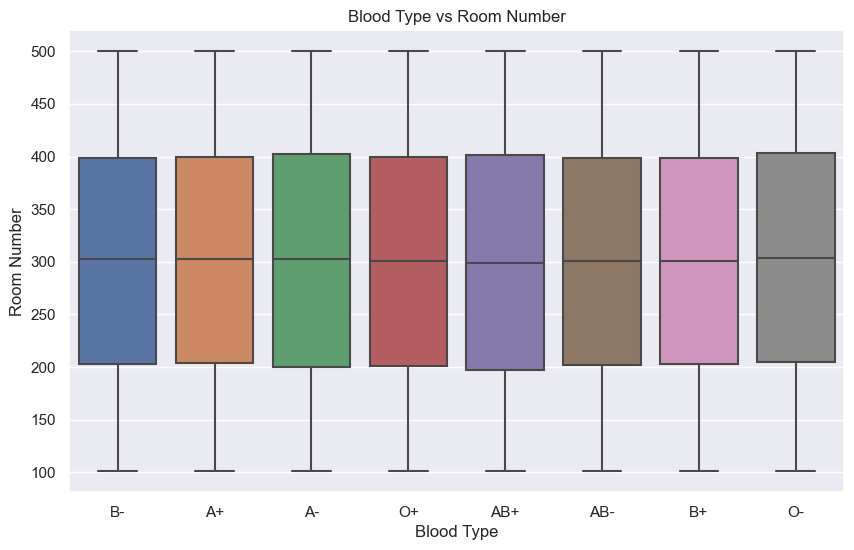

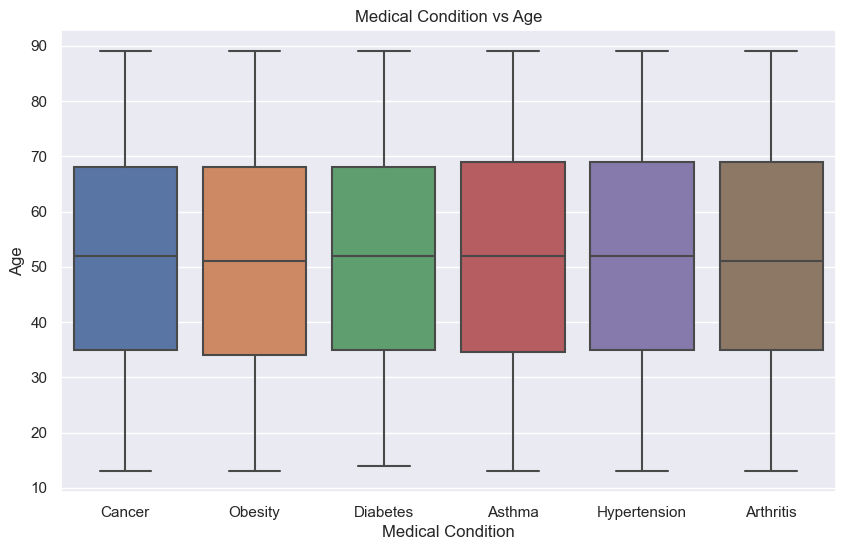

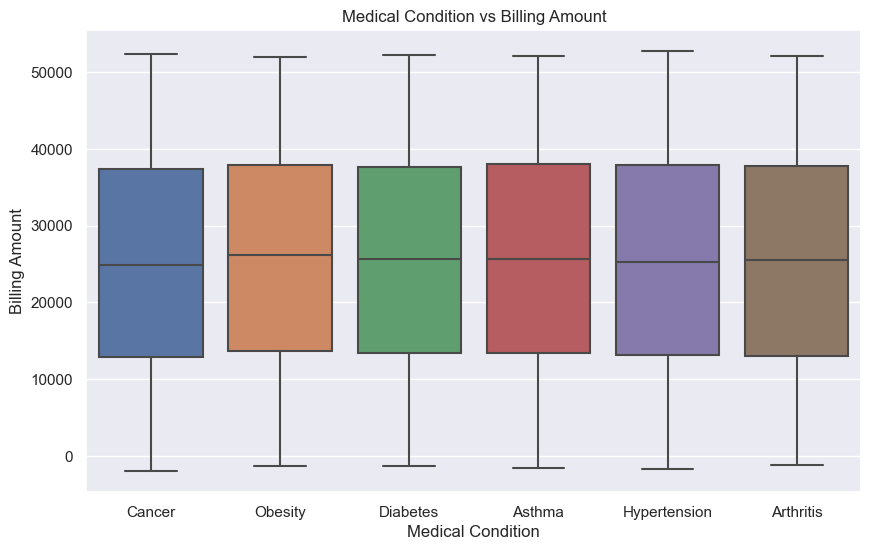

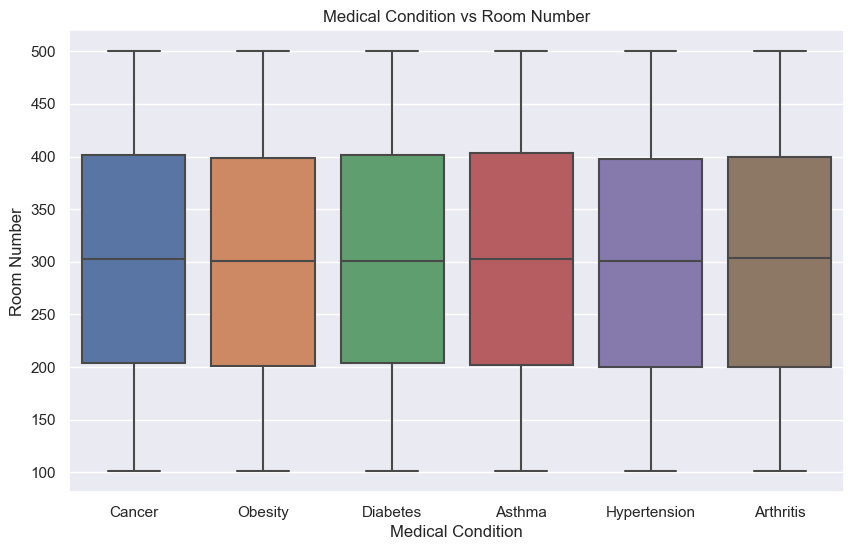

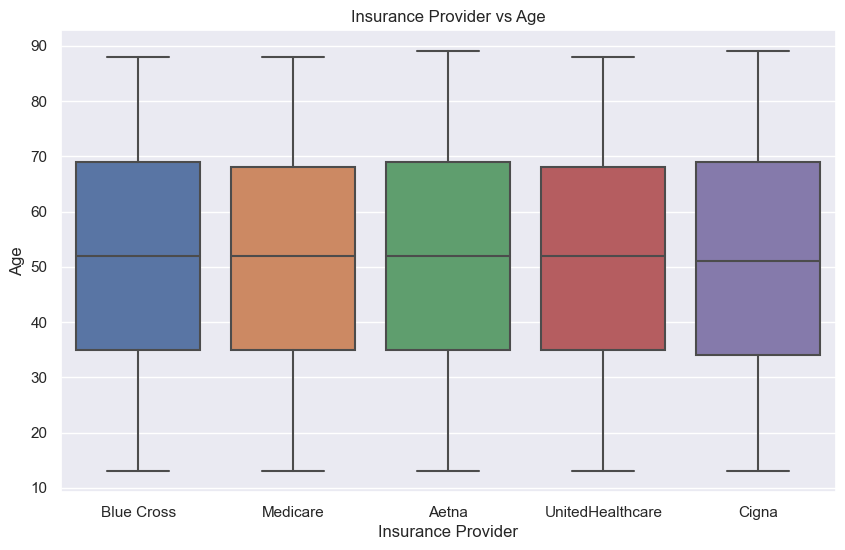

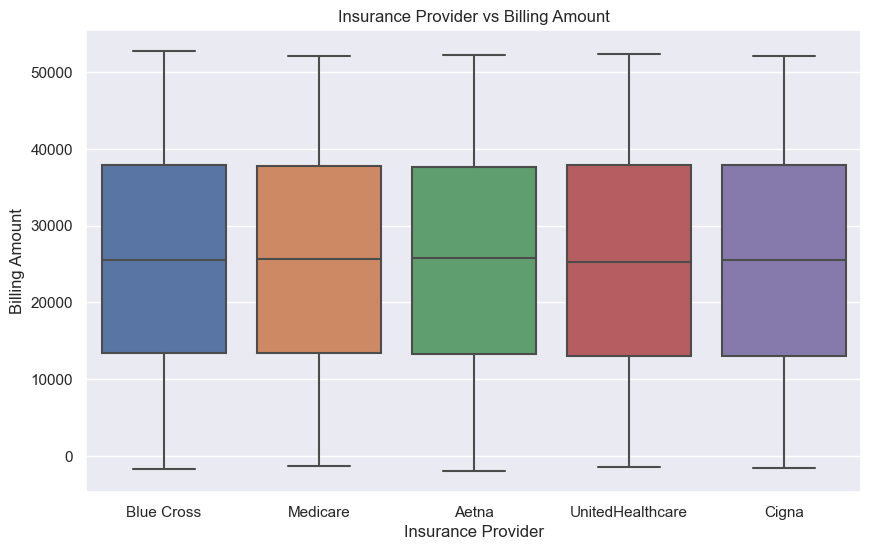

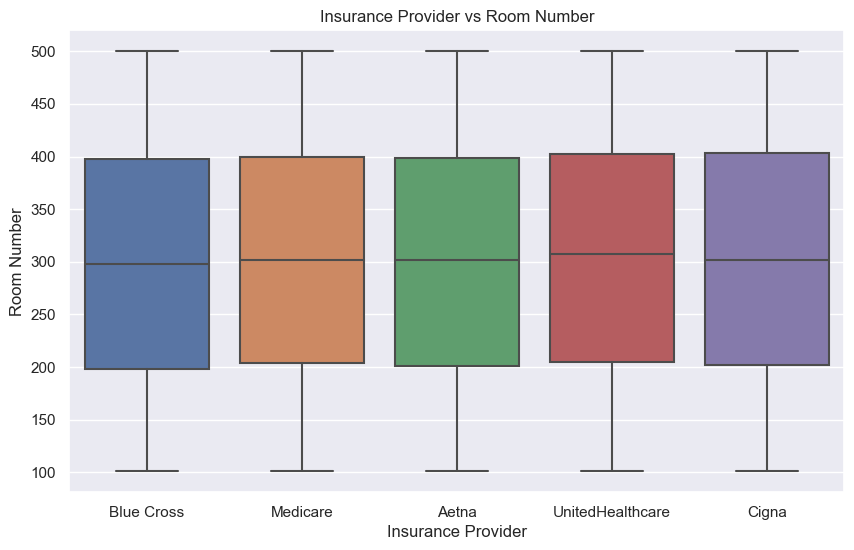

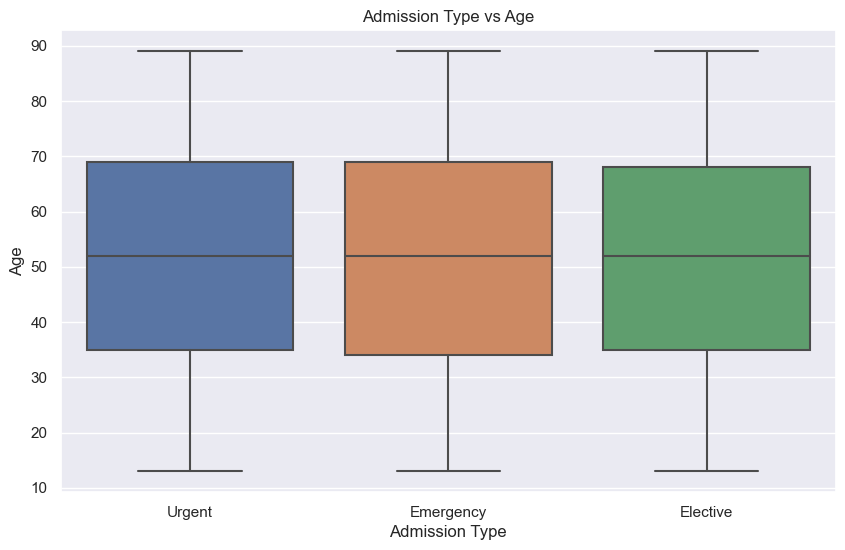

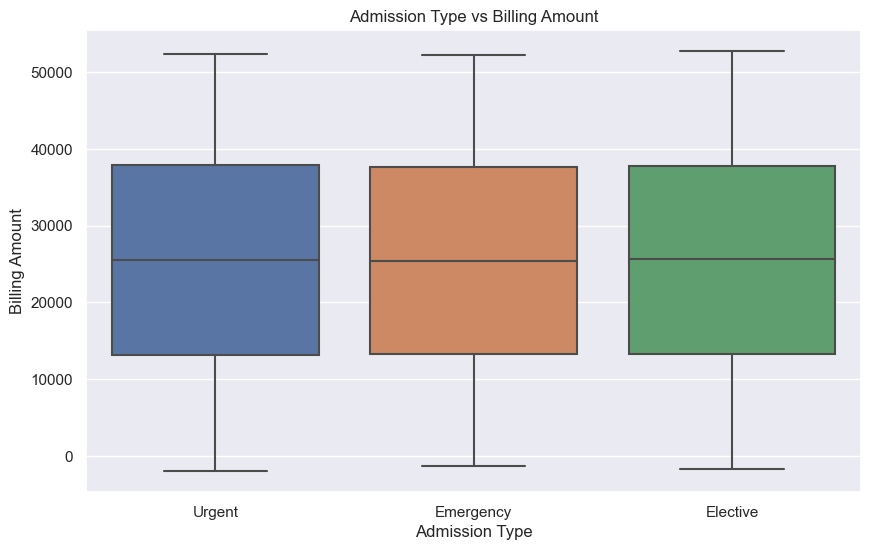

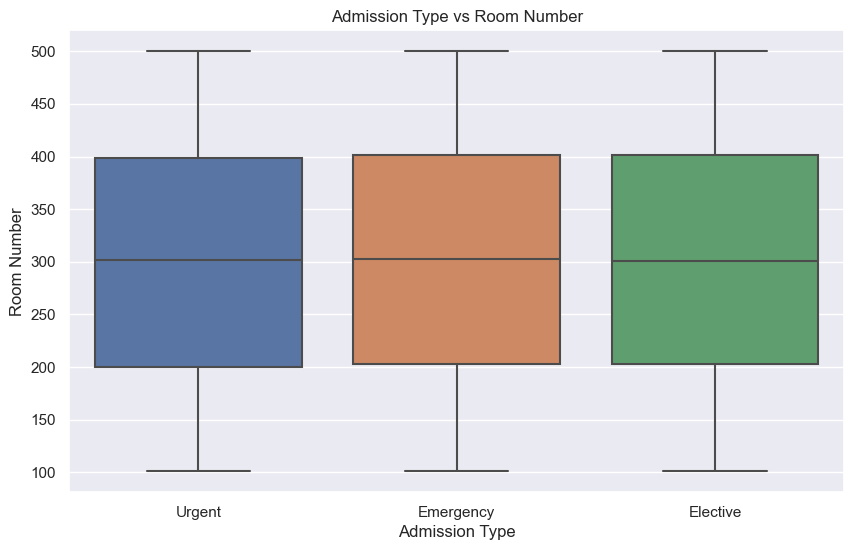

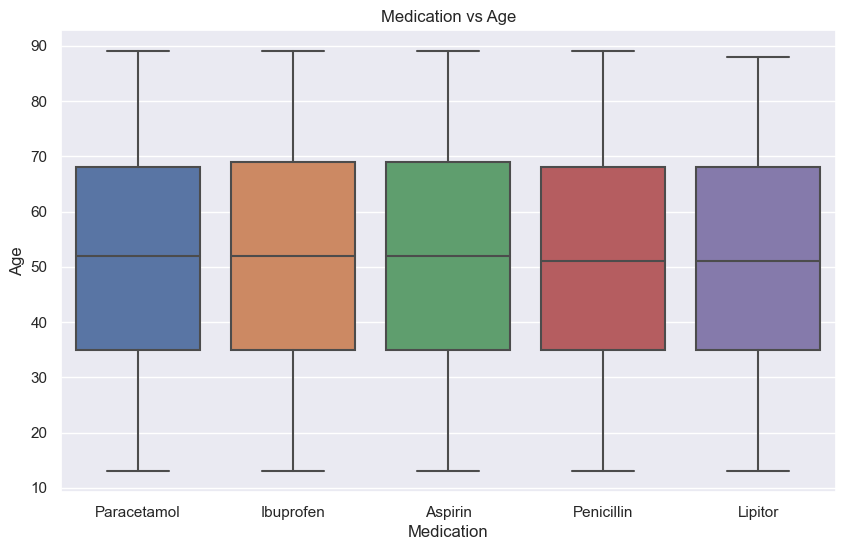

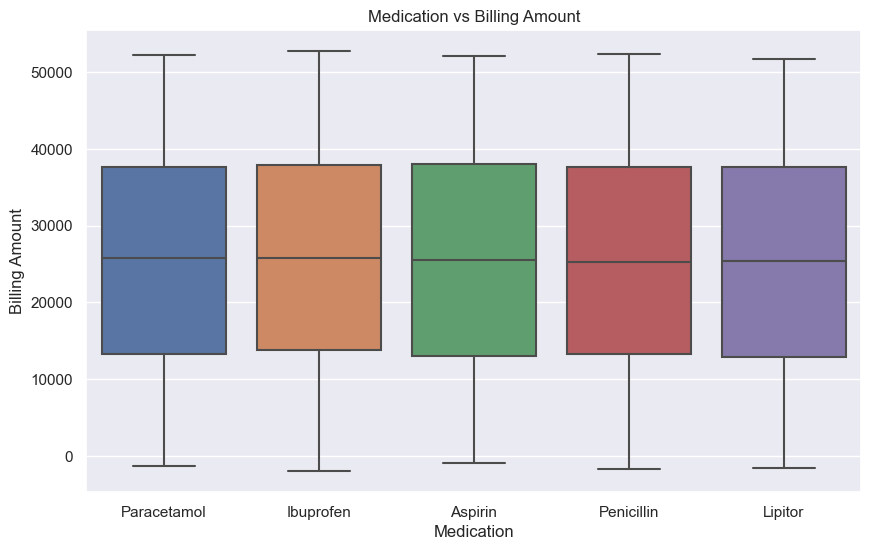

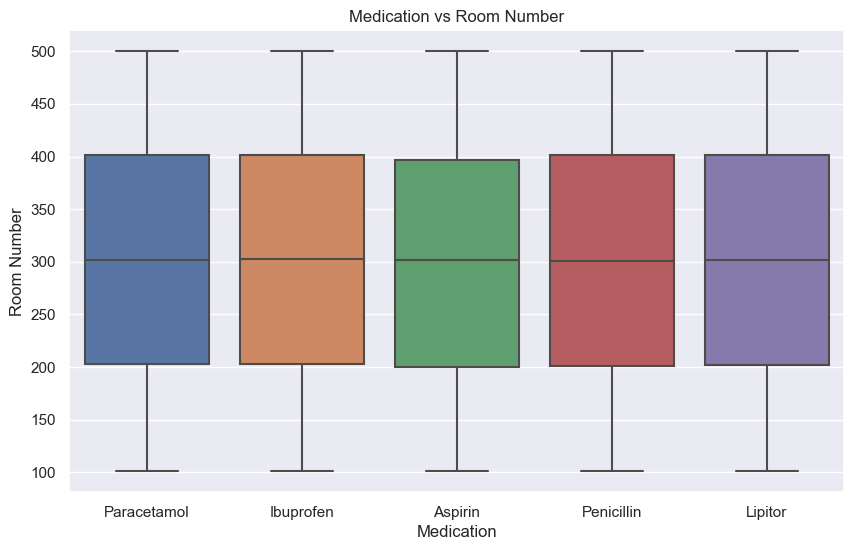

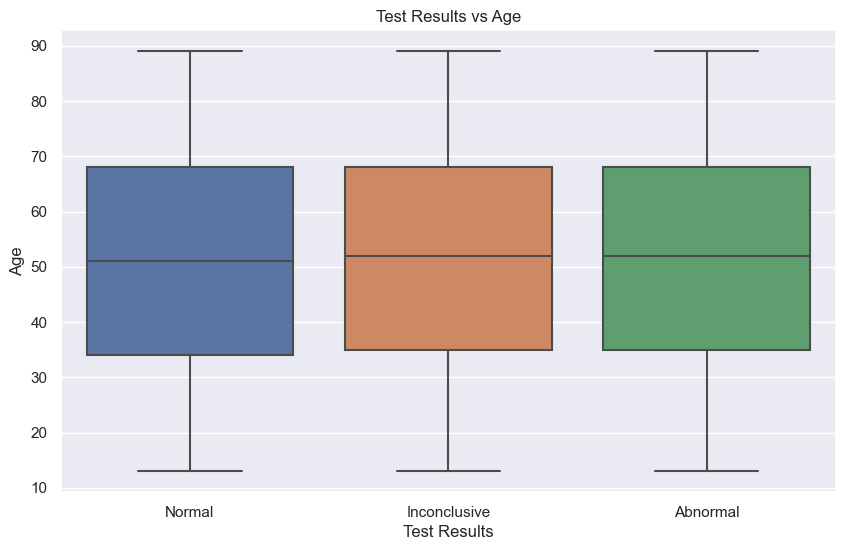

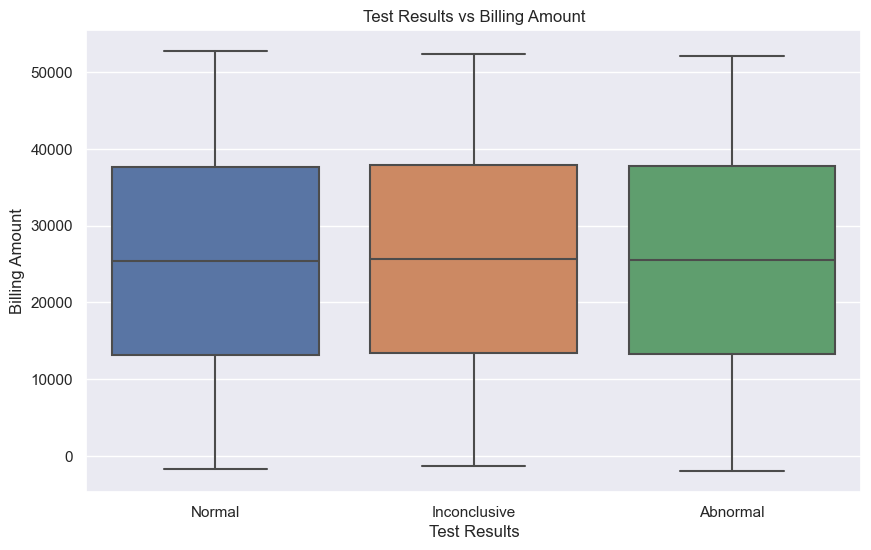

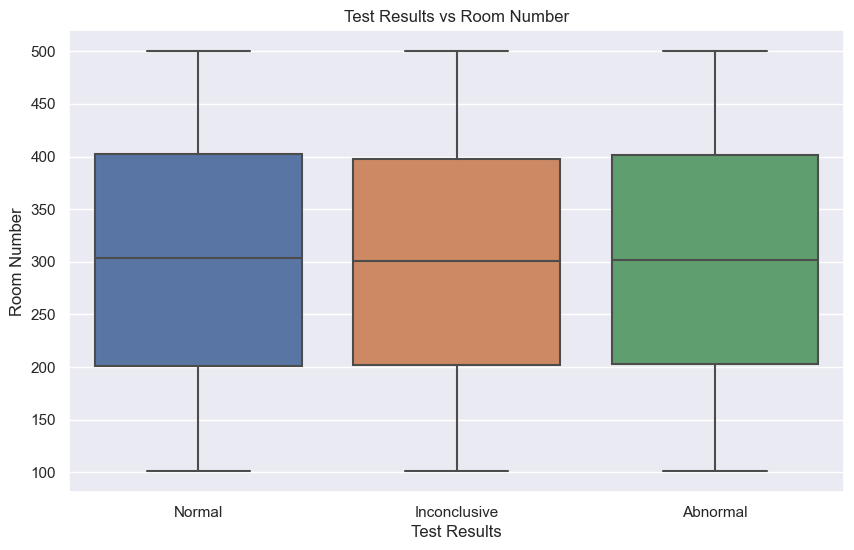

In [25]:
for dis in categorical:
    for cont in continuous:
        plt.figure(figsize=(10,6))
        ax=sns.boxplot(data=df,x=dis,y=cont)
        plt.title(f'{dis} vs {cont}')
        


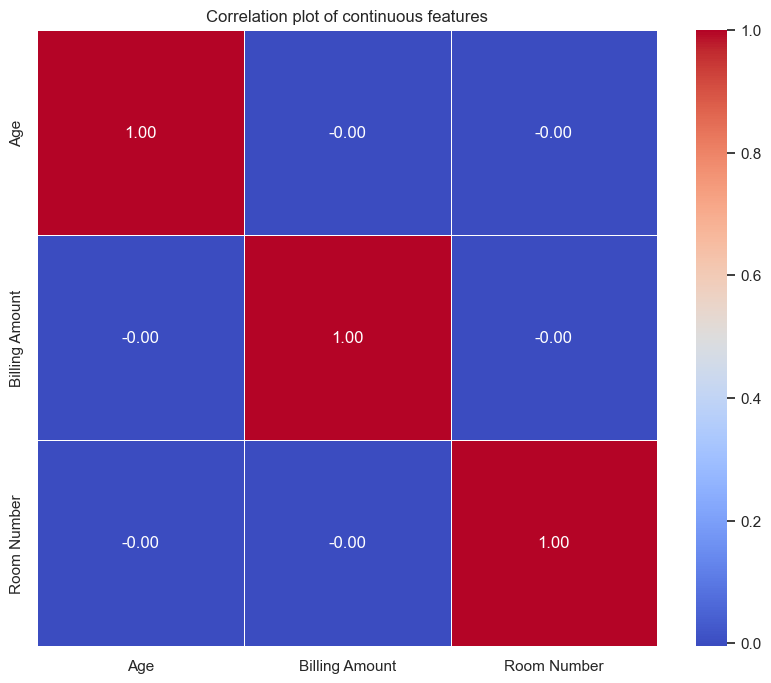

In [26]:
corr_matrix = df[continuous].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f",lw=0.5)
plt.title("Correlation plot of continuous features")
plt.show()

In [27]:
df[df['Gender']=='Male']['Billing Amount']

0        18856.281310
1        33643.327290
5        48145.110950
8        50119.222790
10       12576.795610
             ...     
55489    41893.245150
55490    17350.543520
55492     2588.150832
55494    42535.301230
55498    32451.092360
Name: Billing Amount, Length: 27496, dtype: float64

### Categorical vs Numerical test - ANOVA testing

In [28]:
from scipy.stats import f_oneway
f_stat, p_val = f_oneway(df[df['Gender']=='Male']['Billing Amount'],
                        df[df['Gender']=='Female']['Billing Amount'])

print(f"Anova Result: f-statistics = {f_stat},p-value={p_val}")

Anova Result: f-statistics = 1.3408137444079473,p-value=0.24689554522480017


### Chi-sqaure for categorical

In [29]:
from scipy.stats import chi2_contingency

In [30]:
contingency_table = pd.crosstab(df['Admission Type'],df['Medical Condition'])

chi2,p,dof,ex = chi2_contingency(contingency_table)
print(f"Chi-square Test Result: Chi2={chi2}, p=value={p}")

Chi-square Test Result: Chi2=17.8903466905814, p=value=0.05684174826535973


In [31]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [32]:
pivot_table = pd.pivot_table(df,values = ['Age','Billing Amount'], index=['Gender','Medical Condition','Admission Type'],aggfunc={'Billing Amount':'mean','Age':'mean'})
pivot_table

Age  Billing Amount
Gender Medical Condition Admission Type                           
Female Arthritis         Elective        50.254990    25414.144607
                         Emergency       51.998072    25036.389922
                         Urgent          51.994129    25564.679900
       Asthma            Elective        51.147573    25490.918214
                         Emergency       51.568047    25468.207193
                         Urgent          52.420761    25101.857316
       Cancer            Elective        52.092208    25312.309738
                         Emergency       50.736944    25097.513220
                         Urgent          51.152542    25451.511538
       Diabetes          Elective        51.024918    25709.493051
                         Emergency       51.980731    25565.425113
                         Urgent          51.797973    25404.787550
       Hypertension      Elective        52.416406    25529.889579
                         Emergency       51.614353    25118.920307
                         Urgent          52.363268    25650.239970
       Obesity           Elective        52.106509    25465.834357
                         Emergency       51.024643    26392.463194
                         Urgent          50.866225    25746.819797
Male   Arthritis         Elective        51.591120    25546.952631
                         Emergency       51.445616    25969.665058
                         Urgent          51.963871    25552.155465
       Asthma            Elective        51.488845    25013.631482
                         Emergency       52.054907    26337.884796
                         Urgent          50.992514    26355.873985
       Cancer            Elective        51.183609    26023.609166
                         Emergency       52.953375    24618.664505
                         Urgent          51.230326    24379.955530
       Diabetes          Elective        51.297477    26358.827135
                         Emergency       51.469993    25376.403502
                         Urgent          51.891842    25562.589495
       Hypertension      Elective        50.913565    25580.478874
                         Emergency       50.720350    25825.482969
                         Urgent          52.272307    25311.874010
       Obesity           Elective        51.711513    25913.641197
                         Emergency       51.019897    25254.517370
                         Urgent          50.684418    26059.675047

In [33]:
pivot_table_sum = pd.pivot_table(df,values=['Billing Amount'],index=['Insurance Provider','Test Results'],aggfunc=['sum'],margins=True)
pivot_table_sum

sum
                                Billing Amount
Insurance Provider Test Results               
Aetna              Abnormal       9.171489e+07
                   Inconclusive   9.330576e+07
                   Normal         9.147809e+07
Blue Cross         Abnormal       9.248506e+07
                   Inconclusive   9.548302e+07
                   Normal         9.244101e+07
Cigna              Abnormal       9.562466e+07
                   Inconclusive   9.488665e+07
                   Normal         9.382279e+07
Medicare           Abnormal       9.634342e+07
                   Inconclusive   9.258157e+07
                   Normal         9.398603e+07
UnitedHealthcare   Abnormal       9.478735e+07
                   Inconclusive   9.029127e+07
                   Normal         9.483675e+07
All                               1.404068e+09

In [34]:
pivot_table_multi = pd.pivot_table(df,values=['Billing Amount'],index=['Medical Condition','Gender'],aggfunc=['sum','mean','count','min','max'],margins=True)
pivot_table_multi

sum           mean          count  \
                         Billing Amount Billing Amount Billing Amount   
Medical Condition Gender                                                
Arthritis         Female   1.176154e+08   25337.234722           4642   
                  Male     1.175522e+08   25688.849297           4576   
Asthma            Female   1.143928e+08   25358.633474           4511   
                  Male     1.187435e+08   25903.913291           4584   
Cancer            Female   1.154482e+08   25284.314393           4566   
                  Male     1.144441e+08   25020.562355           4574   
Diabetes          Female   1.177971e+08   25558.060586           4609   
                  Male     1.186899e+08   25762.941147           4607   
Hypertension      Female   1.162115e+08   25434.788625           4569   
                  Male     1.171669e+08   25571.135120           4582   
Obesity           Female   1.183084e+08   25871.071549           4573   
                  Male     1.176983e+08   25737.652254           4573   
All                        1.404068e+09   25544.306284          54966   

                                    min            max  
                         Billing Amount Billing Amount  
Medical Condition Gender                                
Arthritis         Female    -964.798619    52170.03685  
                  Male     -1129.997176    51975.96814  
Asthma            Female   -1306.662189    52181.83779  
                  Male     -1520.420555    51336.22121  
Cancer            Female   -2008.492140    52373.03237  
                  Male     -1277.645337    52092.66990  
Diabetes          Female    -860.617987    52211.85297  
                  Male     -1316.618581    51848.20160  
Hypertension      Female    -652.181369    52764.27674  
                  Male     -1660.009373    52271.66375  
Obesity           Female    -967.594706    51501.64977  
                  Male     -1310.272895    52024.72644  
All                        -2008.492140    52764.27674

In [35]:
grouped_data = df.groupby(['Gender','Medical Condition'])[['Billing Amount','Age']].mean()
grouped_data

Billing Amount        Age
Gender Medical Condition                           
Female Arthritis            25337.234722  51.413615
       Asthma               25358.633474  51.697185
       Cancer               25284.314393  51.328296
       Diabetes             25558.060586  51.601866
       Hypertension         25434.788625  52.137448
       Obesity              25871.071549  51.332167
Male   Arthritis            25688.849297  51.669143
       Asthma               25903.913291  51.495201
       Cancer               25020.562355  51.755575
       Diabetes             25762.941147  51.561754
       Hypertension         25571.135120  51.299651
       Obesity              25737.652254  51.134266

In [39]:
grouped_data_custom = df.groupby('Admission Type')['Billing Amount'].agg([('median','median'),('Standard Deviation','std')])
grouped_data_custom

median  Standard Deviation
Admission Type                                 
Elective        25674.73536        14220.835323
Emergency       25413.78104        14159.764673
Urgent          25543.55847        14244.202912

In [40]:
pd.crosstab(df['Admission Type'],df['Insurance Provider'])

Insurance Provider  Aetna  Blue Cross  Cigna  Medicare  UnitedHealthcare
Admission Type                                                          
Elective             3718        3709   3676      3637              3733
Emergency            3641        3597   3638      3643              3583
Urgent               3463        3646   3825      3759              3698

<Axes: xlabel='Admission Type'>

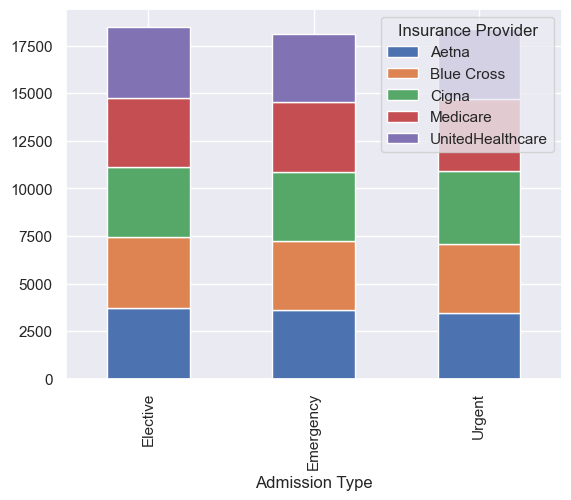

In [41]:
pd.crosstab(df['Admission Type'],df['Insurance Provider']).plot(kind='bar',stacked=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  object 
 1   Age                 54966 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Room Number         54966 non-null  int64  
 11  Admission Type      54966 non-null  object 
 12  Discharge Date      54966 non-null  object 
 13  Medication          54966 non-null  object 
 14  Test Results        54966 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.7+ MB


In [44]:
df['Date of Admission']= pd.to_datetime(df['Date of Admission'])

In [45]:
df['Admission Day'] = df['Date of Admission'].dt.day

In [46]:
df['Admission Month'] = df['Date of Admission'].dt.month

In [47]:
df['Admission Year'] = df['Date of Admission'].dt.year

In [48]:
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0     18856.28131          328         Urgent     02-02-2024  Paracetamol   
1     33643.32729          265      Emergency     26-08-2019    Ibuprofen   
2     27955.09608          205      Emergency     07-10-2022      Aspirin   
3     37909.78241          450       Elective     18-12-2020    Ibuprofen   
4     14238.31781          458         Urgent     09-10-2022   Penicillin   

   Test Results  Admission Day  Admission Month  Admission Year  
0        Normal             31                1            2024  
1  Inconclusive             20                8            2019  
2        Normal             22                9            2022  
3      Abnormal             18               11            2020  
4      Abnormal             19                9            2022

In [50]:
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'],format='%d-%m-%Y')

In [51]:
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0     18856.28131          328         Urgent     2024-02-02  Paracetamol   
1     33643.32729          265      Emergency     2019-08-26    Ibuprofen   
2     27955.09608          205      Emergency     2022-10-07      Aspirin   
3     37909.78241          450       Elective     2020-12-18    Ibuprofen   
4     14238.31781          458         Urgent     2022-10-09   Penicillin   

   Test Results  Admission Day  Admission Month  Admission Year  
0        Normal             31                1            2024  
1  Inconclusive             20                8            2019  
2        Normal             22                9            2022  
3      Abnormal             18               11            2020  
4      Abnormal             19                9            2022

In [52]:
df['Discharge Day'] = df['Discharge Date'].dt.day

In [53]:
df['Discharge Month'] = df['Discharge Date'].dt.month
df['Discharge Year'] = df['Discharge Date'].dt.year

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54966 non-null  object        
 1   Age                 54966 non-null  int64         
 2   Gender              54966 non-null  object        
 3   Blood Type          54966 non-null  object        
 4   Medical Condition   54966 non-null  object        
 5   Date of Admission   54966 non-null  datetime64[ns]
 6   Doctor              54966 non-null  object        
 7   Hospital            54966 non-null  object        
 8   Insurance Provider  54966 non-null  object        
 9   Billing Amount      54966 non-null  float64       
 10  Room Number         54966 non-null  int64         
 11  Admission Type      54966 non-null  object        
 12  Discharge Date      54966 non-null  datetime64[ns]
 13  Medication          54966 non-null  object        


In [55]:
df['Days']=df['Date of Admission' ]-df['Discharge Date']
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  ...  Discharge Date   Medication  Test Results  \
0     18856.28131  ...      2024-02-02  Paracetamol        Normal   
1     33643.32729  ...      2019-08-26    Ibuprofen  Inconclusive   
2     27955.09608  ...      2022-10-07      Aspirin        Normal   
3     37909.78241  ...      2020-12-18    Ibuprofen      Abnormal   
4     14238.31781  ...      2022-10-09   Penicillin      Abnormal   

  Admission Day Admission Month  Admission Year  Discharge Day  \
0            31               1            2024              2   
1            20               8            2019             26   
2            22               9            2022              7   
3            18              11            2020             18   
4            19               9            2022              9   

   Discharge Month  Discharge Year     Days  
0                2            2024  -2 days  
1                8            2019  -6 days  
2               10            2022 -15 days  
3               12            2020 -30 days  
4               10            2022 -20 days  

[5 rows x 22 columns]